In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr,spearmanr
from datetime import datetime
from sklearn.metrics import mean_squared_error 
from tiltFTSE import tiltFTSE
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from statsmodels.distributions.empirical_distribution import ECDF

                   Open        Close
2017-06-19  7463.500000  7467.553640
2017-06-20  7473.006003  7415.607175
2017-06-21  7417.185781  7386.635677
2017-06-22  7388.358848  7390.792403
2017-06-23  7380.986687  7366.812708
...                 ...          ...
2019-12-16  7926.732335  8073.604901
2019-12-17  8060.665604  8114.975579
2019-12-18  8101.283618  8132.565243
2019-12-19  8137.236258  8164.086311
2019-12-20  8164.893836  8174.578532

[638 rows x 2 columns]


<Figure size 900x700 with 1 Axes>

In [115]:
def jackTilt(catTilts,tiltWeights):
    # Assigns the catTilts to each company and runs tiltFTSE.
    minePd,mineOth,autoRel,autoCar,defenceInd,finSec,jMat,noInt=catTilts
    tiltWeights['Weights'] = [
    minePd	#AAL
    ,noInt	#ABF
    ,noInt	#ADM
    ,noInt	#AHT
    ,mineOth #ANTO
    ,autoCar	#AUTO
    ,noInt	#AV.
    ,noInt	#AVV
    ,noInt	#AZN
    ,defenceInd	#BA.
    ,defenceInd	#BAB
    ,noInt	#BARC
    ,noInt	#BATS
    ,noInt	#BDEV
    ,mineOth#BHP
    ,noInt	#BKG
    ,noInt	#BLND
    ,autoRel #BNZL
    ,noInt	#BP
    ,noInt	#BRBY
    ,noInt	#BT-A
    ,noInt	#CCH
    ,noInt	#CCL
    ,noInt	#CNA
    ,noInt	#CPG
    ,noInt	#CRDA
    ,noInt	#CRH
    ,noInt	#CTEC
    ,noInt	#DCC
    ,noInt	#DGE
    ,noInt	#DLG
    ,mineOth #EVR
    ,noInt	#EXPN
    ,autoRel #EZJ
    ,noInt	#FERG
    ,noInt	#FLTR
    ,mineOth #FRES
    ,noInt	#GFS
    ,mineOth #GLEN
    ,noInt	#GSK
    ,noInt	#GVC
    ,noInt	#HIK
    ,finSec #HL.
    ,noInt	#HLMA
    ,noInt	#HMSO
    ,finSec #HSBA
    ,noInt	#HSX
    ,noInt	#IAG
    ,noInt	#IHG
    ,finSec #III
    ,noInt	#IMB
    ,noInt	#INF
    ,noInt	#ITRK
    ,noInt	#ITV
    ,noInt	#JD.
    ,noInt	#JE.
    ,jMat	#JMAT
    ,noInt	#KGF
    ,noInt	#LAND
    ,finSec	#LGEN
    ,finSec	#LLOY
    ,finSec	#LSE
    ,noInt	#MCRO
    ,noInt	#MDC
    ,defenceInd	#MGGT
    ,noInt	#MKS
    ,noInt	#MNDI
    ,finSec #MNG
    ,finSec #MRO
    ,noInt	#MRW
    ,noInt	#NG.
    ,noInt	#NMC
    ,noInt	#NXT
    ,autoRel #OCDO
    ,finSec #PFG
    ,noInt	#PHNX
    ,minePd	#POLY
    ,finSec #PRU
    ,noInt	#PSN
    ,noInt	#PSON
    ,noInt	#RB.
    ,finSec #RBS
    ,noInt	#RDSA
    ,noInt	#RDSB
    ,noInt	#REL
    ,mineOth #RIO
    ,defenceInd	#RMG
    ,noInt	#RMV
    ,defenceInd	#RR.
    ,noInt	#RSA
    ,noInt	#RTO
    ,noInt	#SBRY
    ,finSec #SDR
    ,noInt	#SGE
    ,noInt	#SGRO
    ,noInt	#SKG
    ,finSec #SLA
    ,noInt	#SMDS
    ,mineOth #SMIN
    ,finSec #SMT
    ,noInt	#SN.
    ,noInt	#SPX
    ,noInt	#SSE
    ,finSec #STAN
    ,finSec #STJ
    ,noInt	#SVT
    ,noInt	#TSCO
    ,noInt	#TUI
    ,noInt	#TW.
    ,noInt	#ULVR
    ,noInt	#UU.
    ,noInt	#VOD
    ,noInt	#WG.
    ,noInt	#WPP
    ,noInt	#WTB
    ]
    return tiltFTSE(tiltWeights)


In [97]:
plPrice = pd.read_csv('plPrice17-19.csv')
plPrice.drop(columns = ['Hong Kong 8:30','Hong Kong 14:00','New York 9:30'],inplace = True)
plPrice.rename(columns = {'London 09:00':'Price'},inplace= True)
plPrice.dropna(how='any',inplace = True)
plPrice.to_csv('plPrice17-20Updated.csv')
plPrice['Date'] = pd.to_datetime(plPrice['Date'])
plPrice=plPrice[plPrice['Date'] < datetime.strptime('Dec 21, 2019', '%b %d, %Y').date()]

In [98]:
FTSEStocksEachQuarter = pd.read_csv(r'FTSEStocksEachQuarter.csv')
fullStockListDf = pd.read_csv(r'fullFTSEStockList17-20.csv')
fullStockListDf.drop(columns = 'Unnamed: 0', inplace = True)

FTSE = pd.read_csv(r'FTSE17-20.csv')
FTSE['Date'] = pd.to_datetime(FTSE['Date'])
FTSE=FTSE[FTSE['Date'] > datetime.strptime('Jun 16, 2017', '%b %d, %Y').date()]
FTSE=FTSE[FTSE['Date'] < datetime.strptime('Jan 01, 2020', '%b %d, %Y').date()]

simulatedFTSE = pd.read_csv('fullSimulatedFTSEPrice.csv')
simulatedFTSE.rename(columns = {'Unnamed: 0':'Date'},inplace = True)
simulatedFTSE['Date'] = pd.to_datetime(simulatedFTSE['Date'])


quarterCutOffDates = [   datetime.strptime('Jun 19, 2017', '%b %d, %Y').date(), \
                         datetime.strptime('Sep 18, 2017', '%b %d, %Y').date(), \
                         datetime.strptime('Dec 18, 2017', '%b %d, %Y').date(), \
                         datetime.strptime('Mar 19, 2018', '%b %d, %Y').date(), \
                         datetime.strptime('Jun 18, 2018', '%b %d, %Y').date(), \
                         datetime.strptime('Sep 24, 2018', '%b %d, %Y').date(), \
                         datetime.strptime('Dec 24, 2018', '%b %d, %Y').date(), \
                         datetime.strptime('Mar 18, 2019', '%b %d, %Y').date(), \
                         datetime.strptime('Jun 24, 2019', '%b %d, %Y').date(), \
                         datetime.strptime('Sep 23, 2019', '%b %d, %Y').date(),
                          datetime.strptime('Dec 23, 2019', '%b %d, %Y').date()
                        ]
quarterNames = ['Q3,17','Q4,17', 'Q1,18', 'Q2,18', 'Q3,18', 'Q4,18', 'Q1,19', 'Q2,19', 'Q3,19', 'Q4,19']


FTSE=FTSE[FTSE['Date'] > datetime.strptime('Jun 16, 2017', '%b %d, %Y').date()]
if len(quarterCutOffDates) == 10:
    quarterCutOffDates.append(datetime.strptime('Dec 23, 2019', '%b %d, %Y').date())

indexDivisors = pd.DataFrame({'Quarter CO Date': quarterCutOffDates[1:]}, index = quarterNames)


In [99]:
tiltWeights = pd.DataFrame(index = fullStockListDf['0'].values)
tiltWeights['Weights'] = np.random.uniform(-2,2,tiltWeights.shape[0])

tiltedFTSE = tiltFTSE(tiltWeights)

In [106]:
#Get only 2019 FTSE values for tilted FTSE, simulated untilted FTSE and real FTSE - starting from the beginning of Q1 19 (24/12/18) to Q4 (20/12/19)
tiltedFTSE2019 = tiltedFTSE[tiltedFTSE.index > datetime.strptime('Dec 23, 2018', '%b %d, %Y')]
simulatedFTSE2019=simulatedFTSE[(simulatedFTSE['Date'] > datetime.strptime('Dec 23, 2018', '%b %d, %Y').date()) & (simulatedFTSE['Date'] < datetime.strptime('Dec 21, 2019', '%b %d, %Y').date())]
FTSE2019=FTSE[(FTSE['Date'] < datetime.strptime('Dec 21, 2019', '%b %d, %Y').date()) & (FTSE['Date'] > datetime.strptime('Dec 23, 2018', '%b %d, %Y').date())]

#Get only 2018 FTSE values for tilted FTSE and real FTSE - starting from the beginning of Q1 19 (24/12/18) to Q4 (20/12/19)
tiltedFTSE2018 = tiltedFTSE[(tiltedFTSE.index > datetime.strptime('Dec 16, 2017', '%b %d, %Y')) & (tiltedFTSE.index < datetime.strptime('Dec 23, 2018', '%b %d, %Y'))]
simulatedFTSE2018=simulatedFTSE[(simulatedFTSE['Date'] > datetime.strptime('Dec 16, 2017', '%b %d, %Y')) & (simulatedFTSE['Date'] < datetime.strptime('Dec 23, 2018', '%b %d, %Y'))]
FTSE2018=FTSE[(FTSE['Date'] < datetime.strptime('Dec 23, 2018', '%b %d, %Y')) & (FTSE['Date'] > datetime.strptime('Dec 16, 2017', '%b %d, %Y'))]

#get pl pice for 2019
plPrice19=plPrice[plPrice['Date'] > datetime.strptime('Dec 23, 2018', '%b %d, %Y').date()]

#get pl price for 2018
plPrice18 = plPrice[(plPrice.Date < datetime.strptime('Dec 23, 2018', '%b %d, %Y')) & (plPrice.Date > datetime.strptime('Dec 16, 2017','%b %d, %Y'))]


In [101]:
#this one takes ages to run don't do it, run the next one instead
dart_2019_single=[]
for i in range(1000):
    tiltWeights = pd.DataFrame(index = fullStockListDf['0'].values)
    tiltWeights['Weights'] = np.random.uniform(-2,2,tiltWeights.shape[0])

    tiltedFTSE = tiltFTSE(tiltWeights)

    #Get only 2019 FTSE values for tilted FTSE, simulated untilted FTSE and real FTSE - starting from the beginning of Q1 19 (24/12/18) to Q4 (20/12/19)
    tiltedFTSE2019 = tiltedFTSE[tiltedFTSE.index > datetime.strptime('Dec 23, 2018', '%b %d, %Y')]
    
    #Pl price for the same period is 'plPrice19' defined where individual stock correlations are found
    #

    #find correlation between tilted FTSE and palladium price
    correlationTiltedFTSE = pearsonr(tiltedFTSE2019['Open'].values,plPrice19['Price'].values)
    
    # add correlation to sample list
    dart_2019_single.append(correlationTiltedFTSE[0])


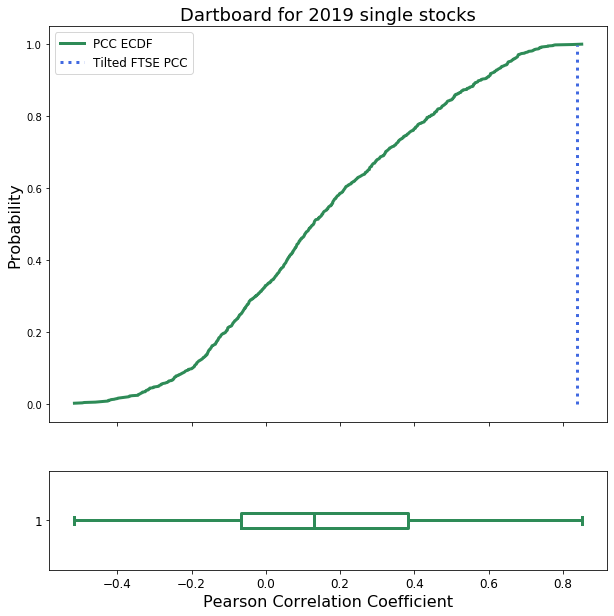

In [4]:
# generated from the above code, 2019 individual stocks
dart_2019_single=[0.27924888489426236, 0.473304320839548, -0.04577660856341976, 0.3576380981293174, -0.03393625314560254, 0.03369396487777625, 0.014347817365428655, 0.1155729002146832, 0.025467538103457067, 0.07198713739379221, 0.04943961456066684, 0.299813254458141, 0.07774951201181904, -0.10720236112653961, 0.4780868091891681, -0.32317331914617015, 0.3453064272201678, -0.2502353155822604, -0.05450327188816216, -0.19200538138272424, -0.10667899724678395, -0.1576767693233565, -0.1413538682927435, 0.38047265457664947, 0.3606867135401547, -0.0575510413165797, 0.4139025526760055, 0.21005445452096788, 0.4521479149740242, -0.18792815553245124, 0.36581007722835246, -0.20888915339280467, 0.40869516785494064, 0.013611828615108977, 0.7363646120110631, -0.0676542395350564, 0.5045966361652077, -0.26470171959085753, 0.45572380115097766, 0.24105936469727907, 0.3079950694282097, 0.4710075260477133, 0.10413563597888498, 0.4592953948464028, 0.40281615509749125, -0.10234498388839015, 0.03147376680476434, 0.6431937857744081, 0.03598099125900926, -0.3022633466015926, 0.4266101218467759, 0.4128768167812543, 0.45414850968990567, -0.17728738360569446, 0.6351054778421349, 0.2346631189330205, 0.5489265235205633, 0.09197498766347766, -0.13299741354279737, 0.3481163950614284, 0.3316631581605225, 0.35072922752371627, 0.46095826378646637, 0.4753999840550137, -0.1087347902805526, 0.625399762072038, -0.16034824624433228, 0.3253458571964088, -0.01266526753049381, 0.6160862387587197, 0.5194231875479087, -0.09817769057971491, 0.5612320433914204, -0.0015515338263164605, 0.0007168596691746248, 0.6733943117112735, -0.15503350962256526, 0.386338450899388, 0.5129853136798168, -0.07842872914515744, 0.4091277655917858, 0.023303136909801264, 0.10092312513592756, 0.20578572289676844, 0.4830289539227773, -0.0680757824953522, 0.04164909759896396, -0.07775117361799246, 0.44060946229325526, 0.17929445460259785, -0.11383078117214629, 0.5809487676126236, 0.5059557317687399, 0.04806796815892891, 0.49478536263558204, 0.22245552436054788, 0.6212405863313694, 0.17723273909595902, -0.015700231398025653, -0.1188442299597898, 0.6412797428808257, -0.007191212471420417, 0.08753094147002509, 0.34047325820109764, 0.5557471112827952, 0.13260170194482274, 0.038992501835735674, 0.16301009788281326, 0.29450388035219877, -0.12853636701490478, -0.34433185229265734, 0.10373165763958994, 0.11433994385974358, 0.11477118802360065, -0.1469685996029353, 0.2144026923149726, 0.047952775685701485, 0.07371830655928888, 0.6506177520734586, -0.13513036413305338, 0.18024317393090195, 0.0686242588919771, -0.01604852849790564, 0.4206160958832295, 0.48794021587240793, -0.04751348517371091, -0.23462665512605257, 0.5715798924420041, 0.7164055508613718, -0.07182199987585652, 0.27942383597384945, -0.02423346233675811, 0.6861454971151433, 0.07808754825859895, 0.7193632294356025, -0.3040534145158665, 0.5015743902966074, 0.014198558968904493, -0.16988578132803367, -0.3911638048174319, -0.0848126455400201, -0.13588433140398298, -0.044117008055541036, -0.057732879638334636, -0.1300413049739449, -0.35946382421585055, -0.2238522062440884, 0.03718783057332594, -0.10266514176035138, 0.03960356744301792, 0.509514514442968, 0.06056321448047852, 0.1318306170120751, -0.03735421776889114, 0.14254121047015658, -0.12819242334029968, 0.3094719022231357, 0.21262630622982615, -0.2612300338872612, 0.5416213620151327, 0.19484616933004462, 0.39927155600968584, 0.47448149816580615, 0.5315919053791232, -0.05856271275811718, 0.3251048616615356, 0.002702525777100784, -0.04164717516775046, 0.1597341968501108, 0.5073088660029751, 0.18125761359045295, 0.051060112913672004, 0.279169937877315, 0.741633080700075, 0.16415746577825635, -0.2292656079215645, -0.03617715666288578, -0.4893385313422427, 0.02949384534492548, 0.2625296738100231, -0.0747230639150155, 0.6341234134679106, -0.4493125269227924, 0.5942546498520931, 0.3815510626610008, 0.15348283002001262, 0.28359312809533144, 0.07401584211253037, 0.5422406433835221, 0.27424713678968204, -0.11608436622835576, 0.058577766767660286, 0.4064738018155049, -0.3124240421673977, 0.43279119249574355, -0.149285493492781, 0.15576396713436624, 0.09681124377641573, 0.31939154381491464, -0.04628138235042744, 0.8508476921533208, 0.5702325084619474, 0.734117532507943, 0.07483517456148434, -0.11342691162495805, 0.09368700688839507, 0.11264926167100069, 0.5625524516752543, 0.18418124467454972, 0.1503016912302435, 0.02802323616240926, -0.0019740706853572237, -0.03236359445923406, -0.004843453525127783, 0.1287956759454521, 0.4405957828155143, 0.7200228118640694, -0.07765941237558308, -0.23452070486174614, 0.34593266157977154, 0.08174608158977087, 0.20842683629742087, 0.6159214554044365, -0.3668921831433363, -0.4255432053022967, 0.09249860460648886, -0.08747584519826311, 0.010987842004598698, -0.09462855733952036, 0.2801804182971295, -0.05119998346152199, 0.5317892774988269, 0.23766177356001308, -0.33313845274657405, 0.05467940167708455, 0.2797377468913034, -0.36747058061458054, 0.32230680575681236, 0.29903064081271025, 0.5096362543617343, -0.33241018250244264, 0.6783410414132746, -0.39953756097081905, 0.26787981538857963, -0.1571744105714507, -0.04562526521799675, 0.03743396041580257, 0.10633255033634051, -0.285646949546127, -0.30255742543729147, 0.33964457585094715, 0.2849230583845016, 0.59666150885246, -0.08954213784886525, 0.2934864399203806, -0.4185279081321458, 0.7747499103762985, -0.23146611757472385, 0.01582956927195454, 0.11402572639748768, 0.6792668131072661, -0.31302015226692237, 0.45275672650371973, 0.21577373465587846, 0.6284876210257939, 0.1575717329611428, -0.11825393941458558, -0.4085451661114376, 0.29684591946488487, -0.15768179120336534, 0.22595116558512776, 0.5473428599044171, 0.5266636065686794, -0.07447221576179411, 0.4695983028057504, 0.3646582046664748, 0.6523731754368336, -0.12070176503594399, -0.16280774444682375, 0.12182031465052784, 0.1308536911993049, -0.14543005277838889, 0.28606342913889304, 0.46293818426061273, 0.22888277018944764, 0.47872108296046284, 0.17038786051375338, 0.24660602073534543, 0.33018923249702226, -0.4235013955677075, 0.03985989850136544, -0.16486957203441355, 0.4071581535664607, 0.2525438088865033, 0.07579922634703663, 0.6325912532131938, 0.4878262421719841, 0.16846592263903765, 0.15389235815302985, -0.10373368844763384, -0.15009485500793257, 0.4095616287299252, 0.14109891775236466, 0.41065265283830493, -0.1568777992056577, 0.049581207571776906, -0.13365904059989708, 0.0627985739618908, 0.15055654686854733, 0.025304262408515563, 0.33294249550788324, 0.4740742068121977, 0.18321159880838425, 0.19852237028437986, 0.6081008263963376, 0.5635131573811816, 0.1746147695331688, 0.06053924171604758, 0.23133666132547265, 0.24527906222123463, 0.6524609839454947, 0.35895815259803776, 0.18754225338556013, -0.14815893880805606, -0.3832150891848376, -0.31422028921159123, -0.0830466142620681, 0.48637517880205594, 0.759204004457967, 0.02304028661223184, 0.0035806930692629246, -0.13371257879480927, 0.4298874061708922, -0.24731961007479242, 0.3743237513723345, 0.04735632151379815, -0.33722057592154253, -0.3362105570144359, 0.3186333796127634, 0.36197783969519237, 0.05294049989093094, 0.05600129404513998, 0.054189201572258636, 0.43407838570527724, -0.18376118981215125, -0.01111420728915271, 0.11668617139691087, 0.5800021602662448, 0.20719760445930108, -0.20879004213326718, -0.01870542723277531, 0.5591941881652026, 0.7076072205235393, -0.05904241585578076, -0.1867234232921655, -0.39848889763474754, 0.08307672269220703, 0.14675322377188804, 0.4453805455635287, -0.3246517237144969, 0.15298772810436018, -0.15583469002879907, -0.13909037508001737, -0.12387090029674418, -0.16696325037926701, 0.6980251091346168, -0.029282289916647802, 0.1912959011242945, 0.5261800808588939, 0.5273840293321074, 0.19879591851835063, -0.07556666033277412, -0.1499303846461302, -0.12532741649103518, 0.16897029127199906, -0.12148525247038622, 0.26803972578445845, 0.4334352604813214, -0.06291619078050098, -0.24614769501044076, -0.20407310100121467, 0.11578516058749791, -0.13224348940719838, -0.17438550367435485, 0.17977897245326466, 0.5072466701988522, 0.10133473368048293, -0.021355628402169948, 0.8255084527963021, -0.10613333836087377, -0.1764006315823899, 0.30334065255361553, 0.21036231285787982, 0.18875819897166354, 0.6663575210445339, 0.42767335137627294, 0.28867277146888526, 0.6051326972737803, 0.3876629764030809, 0.18210807664849765, 0.5132617000543869, 0.489384093934455, 0.6891115115898463, 0.13117297181568213, 0.08036087921973299, 0.07879384034870598, -0.15125776176811406, -0.040740343302747443, -0.06409137265534308, 0.49587889199276625, 0.0739082910776029, 0.29706216967488774, 0.3912530171091007, 0.2681453833634997, 0.025024642606775456, 0.47279637697698457, 0.23134005798467716, 0.6008472797636557, 0.15351865165352366, -0.19220717947262791, -0.42367094053149196, 0.48318692097033195, 0.649104877091917, -0.09878325846628505, 0.03642691198971636, -0.08090275354073323, 0.38381265071368764, -0.19818415286410773, 0.060036995046685325, 0.7370948961964281, 0.6129407318093638, -0.3161769088411024, -0.09163170031775038, 0.0376259904986696, 0.40314569794505023, 0.5626771771568326, 0.2432471499434551, -0.40510305055091467, 0.25557792461338413, 0.3223821393527757, -0.2124971822263316, -0.13486344341780884, 0.13012685247823008, 0.3973052223761271, 0.605022638692701, 0.45476036902407957, 0.509539640736894, 0.39071752394899195, 0.4281404481759685, 0.07680754197187457, 0.17721842218871517, 0.572038750222893, 0.6048519996023377, 0.14486690142446013, -0.1464272350585546, 0.28578846524411416, 0.4339637934773969, 0.6638870986114023, -0.2688273573587899, 0.04834508007779267, 0.06619277509721282, 0.3743389677069642, -0.18637145215377549, 0.33637622925682, -0.12785169438592467, 0.3374224405300141, -0.16352266024598863, 0.4909857681543357, 0.402838404514016, -0.16046937719298446, 0.6801652754319901, -0.08339931062434044, 0.2119087796258502, 0.02171382414630814, 0.5025520169874887, -0.08629986524217378, -0.0483702509797681, 0.5591481074793276, 0.2404154803048285, -0.017569126946912053, 0.09602996996701962, 0.28681368788387807, 0.180213250284605, 0.5753051862142498, -0.3318913317377584, 0.1550007428015539, 0.043880123125888015, 0.17471238990098306, 0.5071652170451216, 0.3156576326830595, 0.1808551597636746, 0.5300680722393929, 0.16739925027344355, -0.45918614507560274, -0.0033367658358635748, -0.05475983229690505, 0.2755422933023784, -0.007523769624975971, -0.07344484517831287, -0.05191282397175122, 0.029071227404017554, 0.6665881596788472, 0.006576709284908146, -0.1096000316620237, -0.2266957831096797, 0.11886362467789761, -0.182256678838628, -0.3242232800970797, 0.18357919945244022, 0.13517571978163967, -0.31670944457545114, 0.404826888573665, 0.27382573690838474, 0.27321931892532914, 0.2968541423258349, -0.01049338632239457, 0.5062861558261466, 0.029595799130363646, 0.06378641789593506, 0.1768735160735494, 0.35609389559649085, 0.06855956513285298, 0.04233377874184978, -0.0607800914768488, -0.05407564333936439, -0.022139168952802386, 0.0299409887314801, 0.5641399033283034, 0.5581471025650938, 0.07216762426572679, 0.40909892917262247, 0.6311249796989106, -0.17036551625737062, -0.31464149774759587, -0.1028583425606289, 0.37028768087679753, 0.11152708893009632, 0.37935194296057084, 0.25417438893461247, -0.21522437664007682, -0.1672846674428407, 0.6537924076053119, -0.07204272921018087, 0.6243505851868136, 0.07627628827002908, -0.10325294846460212, 0.10816804998283147, -0.1895676289585424, -0.09155165019868534, 0.46219074324452125, -0.19330327641209866, -0.09269756415501688, 0.16451132972797644, 0.10947438322139735, 0.004465744493268028, 0.07891470484204557, 0.370139260786296, 0.6397087569113029, -0.17123335186149863, 0.08045087991085952, -0.002222966373346802, 0.005570453586026378, 0.5681515983792613, 0.6505290243990135, 0.4458213613739852, 0.16096924556312883, -0.08932676444389889, 0.1994716933582274, 0.0717914320196766, 0.2789917466740891, -0.2793017124128313, 0.031600584459356346, 0.041596141329961936, 0.035299394899841324, 0.4596546361806206, 0.005675119581071133, 0.05543994269658908, -0.1556421610619458, -0.27639169927361673, 0.0901386455041464, -0.06537885701102197, 0.46139093033206685, -0.1069580070644479, 0.22237969433953525, 0.1276310865516049, 0.43052720797096977, 0.4186776168298195, -0.10271343125566415, 0.12852038867007504, -0.1860068713984036, -0.15290773290699122, 0.28765001011538227, 0.14927881010938576, 0.4736156188858685, 0.5180831658794393, 0.37850983323344956, -0.19778901222286893, 0.3210967384747695, -0.05826517401050137, 0.37086880764966945, 0.4818448818034248, -0.4940503398757364, -0.1734628812227365, 0.38888026728825265, -0.2638115571834423, -0.0474929706067862, 0.2941866926920632, 0.7052458254643124, 0.011321623201288546, -0.07229954720977055, 0.6631438146201386, 0.12134376071899058, -0.12110098846548058, -0.15738185497695883, -0.0406554169773006, 0.14488175019159028, 0.4507183843687135, 0.3521544690366475, 0.13053162431291712, 0.3225734893080935, 0.371225597179928, 0.45439112925112235, -0.07479615109582431, 0.032811080586009775, 0.1908823714127724, 0.5002482675676028, -0.2631524544551575, 0.6327360247856892, 0.28498644133278295, 0.3072870862877659, 0.09941343274433198, 0.18985689778001305, 0.11633928496488483, 0.09631273130938939, 0.08215779285013694, -0.3433541088640092, 0.18528870324523272, -0.07983617419772818, 0.12455067756222851, 0.36050966693654163, -0.031627385308696465, -0.05340753804069098, 0.1481996375745251, 0.6467233726313375, 0.6782505311203983, -0.12643486936130205, -0.12260063884309326, 0.2581473711967559, -0.24684936405096947, 0.6969956847828505, 0.60990313918171, 0.5586355938913907, -0.03601413428207367, -0.24192077872615442, 0.1506838047498225, 0.06562603559571602, 0.30415923599163347, -0.05985102824848478, -0.15316732261669797, 0.2602841953222938, -0.20932193736728444, 0.7005442857323527, -0.1476435266468636, 0.19692365771762316, 0.2895908957951258, 0.5802012087263867, 0.39860005575097407, -0.011358414829102534, 0.5582326854107058, -0.2367230762062193, 0.21330706475559214, 0.4294841156270645, 0.23063840749326356, -0.3692888588082113, 0.48843838480517643, 0.17143815351233996, 0.7414939268649121, 0.35585729948640493, 0.31279262012696246, 0.19259850763061737, 0.2812000093317769, 0.05790927344041708, -0.2464312300184253, 0.6002710627546106, 0.1301665476420747, -0.16015207779307883, 0.6766994118331656, -0.43729596867205317, 0.02018945970213295, -0.06574624004648129, 0.22328042733207187, 0.20308452670780908, 0.15656797031159458, 0.6001364388097941, -0.13537906000108707, 0.08253124993706579, 0.3972818460469617, -0.18110492581382986, 0.661422277163478, -0.18286467739028814, 0.3270144164440649, 0.10520883191180169, 0.01714667001502875, 0.23747771420480607, 0.3573545384320852, 0.3999059270775665, 0.5217985137153139, 0.07189106480860205, 0.5512381820121209, 0.09230211587400336, 0.5037860361468205, 0.43781048844057413, -0.0022866987526818025, 0.08391429957482481, 0.08352414001709363, 0.22904893859162817, 0.48062680249772555, 0.5841081247422362, -0.2887506725487298, 0.7519360945550131, 0.4030473524144771, -0.024038060370293626, 0.06512378179387676, 0.6026050619425765, 0.2789944864614756, 0.11885250005337791, 0.6181563282606737, 0.48506828909107513, -0.14461769592627646, -0.04293938148288517, 0.11936505378796164, -0.15472089512019577, 0.1681389446720931, 0.38544679412247557, -0.2709536272413603, 0.3498693571188046, -0.05233569484545165, -0.0632339601261162, 0.24488666272981913, -0.12692234066606284, -0.13028882964379754, 0.18033447637423927, -0.08859906576251453, -0.026869226861047868, 0.7790729775892616, 0.1802133669278265, 0.08695339235183068, 0.08941793559833562, -0.10815092525249438, 0.6748339954512026, -0.25406547981166694, 0.19722335096319538, -0.2815233315304267, 0.10327834554409976, -0.28681183634957497, 0.22127753366055672, -0.15413543524018658, 0.24764738991270924, 0.0639191894208785, 0.2984465140041429, 0.5486356911384584, 0.19621267689701655, 0.3846253829620705, 0.3971194025899771, 0.10399405763152375, 0.08342821382259874, 0.3503002500434109, 0.13346273281075208, 0.3544428174476012, -0.19594723041988868, -0.09032879512766563, -0.2607697549226947, 0.34481529145905887, 0.3070423341693236, -0.24153014125187902, 0.2657500410186726, 0.045955900517107046, 0.5252443317224653, 0.05048511770253812, 0.20416858067788096, 0.6716455075620984, -0.01273226190416791, 0.12717342352459413, 0.31906658661410536, -0.06092040645453895, 0.18859873007272374, 0.2956966426928124, 0.04738803517103852, 0.6208258904444282, 0.1425811929885112, 0.08923153378947607, 0.35734076255995467, -0.14022850360823325, 0.380434799191604, 0.05757709740825201, 0.17659848074575785, -0.018670300626809078, 0.5413434503941378, -0.281436803662104, 0.12943659499609594, 0.20881075017569556, 0.2671216542593871, 0.5951032511545201, -0.044887606841084525, 0.053842947076946215, 0.6845878682933245, 0.05643659918582282, -0.08556700150901489, 0.02662877872108053, 0.6050852512475513, 0.10539047744809057, 0.12290974818629569, 0.3180246783340711, 0.05772517830428413, 0.5193125234989777, 0.2424896632940706, -0.12670763412354707, 0.46406077286898384, 0.28509122517209556, -0.28891902253405655, 0.06849106128515997, 0.4190036033599678, 0.3227938464040375, -0.06206448794734068, 0.6802881438645633, 0.12380672860814725, 0.649372628521092, -0.25343484626220314, 0.32073454595203543, 0.10326508583841365, 0.21600096309738728, 0.09587541827147299, 0.09283329357491055, 0.6518293482983422, 0.26580687132566744, -0.19181706271928173, 0.46056624393653256, 0.10250956927272983, 0.07044400112579946, -0.12837707044674004, 0.08508867319025325, -0.3437330163943026, -0.1915778776746842, -0.01503843222604876, 0.7234274415256954, 0.02050085558416781, 0.08873661518496465, -0.061409052801023274, -0.07063025915884466, 0.10873767751958775, 0.6047939490273739, 0.21482963316218018, 0.6620421299346919, 0.3662545545141506, 0.4248043654390171, 0.3530809841129579, 0.45457453446991525, 0.5586852069701145, -0.06439041571376664, -0.22004643179380384, -0.4169826189673029, -0.11964886214463256, 0.20795793703383278, 0.44266287571945917, 0.05988625426063714, 0.6195077386051024, 0.06135992743959375, -0.33891188401539873, 0.3334319925292557, 0.21831707837584258, 0.020460519215910574, -0.045547582667761585, 0.7370930894832344, 0.0835251148309401, 0.2695734047431997, -0.2186820175332783, 0.44582689142293214, 0.3693698271304801, 0.591074955823677, 0.4337488258174244, -0.07212536873439132, -0.05460522772117818, 0.39372978574000517, 0.10838276544724543, 0.6516299045071346, -0.14469507419680316, -0.34103837438667944, -0.24372920405324044, -0.13301013514611917, 0.18441854566398397, -0.28280075349354, 0.5091922145791459, -0.02708600646420219, 0.10680035545218251, -0.026835282861327983, 0.1306181073708783, 0.06387717742882959, 0.32934078438782477, 0.25707292986599883, 0.42706859234132477, 0.7063142516845249, -0.32152184305204345, 0.20567991888151452, 0.010819472855919318, -0.21714010856073362, -0.18626106389931893, 0.4610522042842896, 0.013841773838709704, 0.1415684174936364, -0.0016349930126023354, -0.1907040847272889, 0.5712456359954151, 0.27484426296458847, 0.15003527044955084, -0.0910470594897704, 0.6779276600485409, 0.541347941283151, 0.12265987854459909, 0.6791345474403956, 0.08843885582205674, 0.6571695928056107, 0.19204216816816772, 0.1543757671503273, -0.1949344997144671, 0.6037785424232047, 0.3056123605213521, -0.02051935676107213, 0.5255195490525653, 0.6150431916821193, 0.05217519646383967, -0.15477468514569948, -0.22749301679952263, -0.07035864749841955, -0.17998274496202793, -0.37559181952648574, -0.1309182588363717, -0.009875930528206178, 0.046823754638506965, 0.08917825248688807, -0.08873108838117605, -0.031186668724953036, 0.16699583848601254, 0.4334936985543939, 0.6713279509136566, -0.2179863192419915, 0.21347517965518065, 0.3157888740554575, -0.12194427806197278, -0.1852789534685502, 0.2397151752284752, 0.3211699895924415, 0.23326696937273717, -0.2488224940150885, 0.16718830681216612, -0.3228165650361383, 0.05483063955590137, 0.63527064092606, 0.3326546079962469, 0.7227763123477041, 0.32842251546864554, -0.1630351850391723, 0.7599397863168537, 0.18858815154521205, 0.3509868934431124, 0.5942896640460829, 0.7270220311215656, -0.045032334720424436, 0.16422930986956824, 0.3073913412325352, -0.05031365306218858, 0.29331438971451745, -0.10351722483739063, -0.2499473303147457, -0.24780096900533052, 0.2109350731366872, 0.7736202294825043, 0.27276403756277184, -0.0063059985631777945, -0.006690376302032824, -0.29530500487523703, 0.25008300629000396, -0.10312579624830948, -0.24203064611497635, 0.024007114840363948, -0.1008791011944009, 0.14129847865955286, 0.5024981850762393, -0.08464459520394751, -0.05057617458260205, 0.4869873912139343, 0.6677306538005052, -0.14674043618132254, 0.13394017015416537, 0.24781208380166153, 0.03579264988479326, -0.19993187629311024, -0.1692670470783163, 0.6264618054521898, -0.5154048342672483, -0.22246771004971183]
#plt.hist(dart_coef, bins=20, density=True)
pcc_2019_single=0.839

ecdf_2019_single=ECDF(dart_2019_single)
fig, ax=plt.subplots(2,1,sharex=True,gridspec_kw={'height_ratios': [4, 1]},figsize=(10,10))
ax[0].plot(ecdf_2019_single.x, ecdf_2019_single.y,c='seagreen',label = 'PCC ECDF',linewidth = 3)
ax[0].plot([pcc_2019_single,pcc_2019_single],[0,ecdf_2019_single(pcc_2019_single)],':',c='royalblue',label = 'Tilted FTSE PCC',linewidth = 3)
#plt.plot([-0.5,0.839],[0.999,0.999],":",c='royalblue')
ax[0].set_ylabel('Probability',fontsize = 16)
plt.xlabel('Pearson Correlation Coefficient',fontsize = 16)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
ax[0].legend(fontsize = 12)
medianprops = dict(linestyle='-', linewidth=3, color='seagreen')
bp=ax[1].boxplot(dart_2019_single,vert=False,whis='range',medianprops=medianprops,boxprops=medianprops,whiskerprops=medianprops,capprops=medianprops)
ax[0].set_title('Dartboard for 2019 single stocks',fontsize=18)
plt.savefig('ECDFSingle19.png',dpi=80)
plt.show()

In [103]:
test_tilt=0.839
print(ecdf_2019_single(test_tilt))

0.999


In [215]:
#this one takes ages to run don't do it, run the next one instead
dart_2018_single=[]
for i in range(10):
    tiltWeights = pd.DataFrame(index = fullStockListDf['0'].values)
    tiltWeights['Weights'] = np.random.uniform(-2,2,tiltWeights.shape[0])

    tiltedFTSE = tiltFTSE(tiltWeights)

    #Get only 2018 FTSE values for tilted FTSE, simulated untilted FTSE and real FTSE - starting from the beginning of Q1 18 (24/12/18) to Q4 (20/12/19)
    tiltedFTSE2018 = tiltedFTSE[(tiltedFTSE.index > datetime.strptime('Dec 16, 2017', '%b %d, %Y')) & (tiltedFTSE.index < datetime.strptime('Dec 23, 2018', '%b %d, %Y'))]
    
    #Pl price for the same period is 'plPrice18' defined where individual stock correlations are found
    #

    #find correlation between tilted FTSE and palladium price
    correlationTiltedFTSE = pearsonr(tiltedFTSE2018['Open'].values,plPrice18['Price'].values)
    
    # add correlation to sample list
    dart_2018_single.append(correlationTiltedFTSE[0])
print(dart_2018_single)


[-0.5472340656094434]


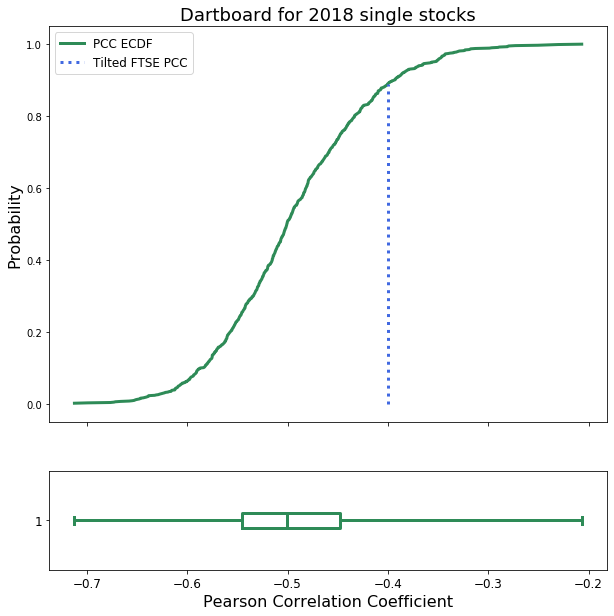

In [5]:
# generated from the above code, 2018 individual stocks
dart_2018_single=[-0.5402415844435526, -0.4802840621688422, -0.5709030243787931, -0.5165108013965896, -0.5599765336114887, -0.5124351750061528, -0.5476196422091091, -0.452716536666007, -0.40352586321774275, -0.48552583715629066, -0.4970030160854868, -0.5429175796662958, -0.6060462945883269, -0.3725986589630368, -0.5328568621739311, -0.4150389164796765, -0.5238997114840803, -0.4813939942751886, -0.5728326062989593, -0.5009990099407176, -0.5660482860664262, -0.43331370301696415, -0.6067221152086218, -0.5036459537090449, -0.6021716938791332, -0.42055751292822485, -0.5082366974679516, -0.542111479658482, -0.479585664634952, -0.46429354420840296, -0.48253038308862317, -0.5268372379430264, -0.4794067909550499, -0.32883388913870326, -0.4357499337176229, -0.5599315754945315, -0.46032420268521757, -0.3898966471361287, -0.5913852296662072, -0.5550255811664242, -0.5041141476028395, -0.31811240791827033, -0.5198799354880145, -0.4648800589626901, -0.4305741025032609, -0.5081773718376212, -0.46809822130160855, -0.5302162228233905, -0.5488652237564748, -0.45511553959448425, -0.4750565892820431, -0.5752235715469672, -0.4901582595437781, -0.5352815603446142, -0.5624936933494062, -0.4653623140310422, -0.4052826614182107, -0.5570515226162573, -0.356566019209971, -0.42408015421667655, -0.39278838270484046, -0.38996782915171957, -0.5420709404149509, -0.48409972790106837, -0.5445432412597286, -0.5088257064226964, -0.5552007163456651, -0.5883553609229413, -0.47780213882464134, -0.6465297529026972, -0.46623232185953123, -0.4278923033258582, -0.5012115633379501, -0.5652702357420911, -0.4840750165870931, -0.5198757685568041, -0.54976408345784, -0.4100420138634593, -0.43525951672047086, -0.4841219593182897, -0.4520110201205563, -0.34343609815517284, -0.6386970387928272, -0.5258181749545745, -0.5009323940264934, -0.42584890906001616, -0.562724136553064, -0.5029869471725199, -0.49956624315513015, -0.5424085136355421, -0.6115127196235615, -0.5990114270104003, -0.5751063490120036, -0.4792796806825409, -0.5582025402597794, -0.6159355573101702, -0.5175038286193339, -0.4698247765793374, -0.511519332130483, -0.5081047222840707, -0.4576481224688401, -0.7123919231101843, -0.5076933010181246, -0.4592683661641044, -0.5523648295644783, -0.45406184564009333, -0.5905678983463297, -0.6097063088864416, -0.2505534435727092, -0.6509781027906264, -0.6022637563203437, -0.4763028407521017, -0.463678608716025, -0.5821436225916785, -0.6123826115630325, -0.5935696295290075, -0.4719811509857378, -0.5819270439530762, -0.390051296151593, -0.2965176292378128, -0.5458726931615309, -0.47423357962869617, -0.4671360839174763, -0.5532783155072585, -0.4345515536338634, -0.34676754057327486, -0.4899861931163446, -0.5070491884183727, -0.5613696930076559, -0.5199134977683685, -0.48297821868110447, -0.5773178515017298, -0.4193324199658397, -0.4395821225980589, -0.31278868033911544, -0.5067168994002806, -0.45619200851847275, -0.3878806418373739, -0.5318705173227873, -0.5351597295928763, -0.36539775052493817, -0.5517769017566398, -0.4295609757397406, -0.4570896482010981, -0.5967201151135879, -0.4412595000271544, -0.46196172412184655, -0.5587510412876853, -0.5750725032891585, -0.5424126931367169, -0.4481590501755689, -0.4586700726805293, -0.6185237195120163, -0.609194345191018, -0.5973854120435157, -0.31772289114839203, -0.5551725660584883, -0.3428135923135614, -0.5287856280925989, -0.47570336094893917, -0.5556644852525664, -0.5587947753263712, -0.5960105769479989, -0.5118383020221038, -0.5105970334037446, -0.3978788592391801, -0.5455656546647991, -0.39133574874094573, -0.5694955558130554, -0.5464687321069003, -0.5456925994266243, -0.5129973223815743, -0.6764943099803016, -0.6665929968546386, -0.40118280526427125, -0.41012757998358707, -0.3434850401870041, -0.4720993764245147, -0.37941859596613825, -0.5152851165989554, -0.37283679788206286, -0.45692907697082324, -0.5758252434682976, -0.5600812500384319, -0.5024127402040447, -0.42760253161865375, -0.4518170459617438, -0.5672828119693424, -0.5053154089818268, -0.4402517092185437, -0.5539920854680476, -0.5145363644981775, -0.559145775888217, -0.35107609204094864, -0.6237705269253884, -0.4400000181569842, -0.5300212241514415, -0.5067961509581744, -0.5322640611698507, -0.349706054567679, -0.4586746717489549, -0.5310140882470807, -0.4633978782154485, -0.4815329002654129, -0.43203228098906943, -0.4525710049141368, -0.5064435584859479, -0.33197761482692756, -0.546221589018723, -0.5335242995776712, -0.5394870010870995, -0.6006556189197514, -0.5908632021731516, -0.5540293565238489, -0.6054304571048059, -0.570831315525653, -0.6048858754536499, -0.5937318542829977, -0.4843930734117771, -0.5376123942449464, -0.47013097162440187, -0.5378075987765664, -0.4987907126593824, -0.47355998795995874, -0.5277358437086961, -0.5136537971922666, -0.4598323496852089, -0.5994585505394285, -0.5489129760362643, -0.5013952927696913, -0.5306018542395836, -0.642201580053757, -0.5089245660114491, -0.5997059888086027, -0.4849535578643498, -0.5708127728549547, -0.27965086322695076, -0.4908577623778183, -0.4574164490950698, -0.4980343188873086, -0.5764017485648394, -0.4797957129987136, -0.5804646589405094, -0.41546110250523294, -0.5202044813680584, -0.38407338898401516, -0.4387676031268131, -0.41229417089813686, -0.4838833700751554, -0.5040019113493519, -0.598350738933533, -0.5015672773818209, -0.5023214941235485, -0.36944113130087497, -0.3912029506777812, -0.4145792180480581, -0.6265307635376345, -0.5285558780754092, -0.5500535614389244, -0.447757987445173, -0.4257496462728241, -0.5575748069074316, -0.4979555516441286, -0.5751919812834116, -0.5375700396877297, -0.455376802127007, -0.5907608436212723, -0.5300809658146783, -0.4944558264463499, -0.5234654652615202, -0.4601269749002045, -0.49314329530044265, -0.5151929028847897, -0.5971083911285064, -0.49094607497803855, -0.5116440172071883, -0.4937047801290418, -0.4962073880558281, -0.4549091638614507, -0.4796593436911266, -0.431713570278361, -0.4773397326028126, -0.4097681449421942, -0.5780039479406778, -0.44570484453489245, -0.4179358835786609, -0.4700395853456338, -0.39461900903824854, -0.4247012923957304, -0.5817362927091394, -0.5103837502999579, -0.48178087839499506, -0.44187219855867166, -0.5485564633935404, -0.49519547225663646, -0.5107756949683977, -0.4663571491606968, -0.5016278409888726, -0.6399130405461013, -0.517034666214556, -0.45434982054988193, -0.5604988789132005, -0.40804559597929035, -0.5070424270296696, -0.5090645037210133, -0.5614928591105693, -0.44989014127405735, -0.5809390053708626, -0.5937069058445616, -0.4902283206072825, -0.4138897844539904, -0.48256874057193083, -0.4825778507502623, -0.4409509233371818, -0.6437299710942879, -0.3829663833728687, -0.5184889548883902, -0.5436966925906717, -0.4790611304390356, -0.4398141687850083, -0.2805913474081234, -0.5831464055803082, -0.5364720195287257, -0.44918135533504155, -0.443959147894508, -0.4867751292832034, -0.5735688594488225, -0.5405771672252402, -0.5394102978502843, -0.6118709970360381, -0.5896384365505467, -0.5002962193312126, -0.5275525359969074, -0.6093301826056386, -0.40295410427131234, -0.5144154437395043, -0.4089352537511873, -0.3566892697398648, -0.501960134566015, -0.5060610929528591, -0.5826598753072976, -0.40969975631758915, -0.5751496012150821, -0.4073935886014083, -0.47879996522862267, -0.4668904245224972, -0.581809338648337, -0.35162421680950273, -0.5306144237486781, -0.4713257601011635, -0.44159606637231885, -0.46660570845386085, -0.5676333800960514, -0.5101009072499415, -0.5003722655189413, -0.4727763407838515, -0.4736150854084796, -0.5143394224141389, -0.4954738958714136, -0.5604163683161172, -0.4148865318261702, -0.4347624073026508, -0.4631213160258843, -0.34690827329664736, -0.5412513390079641, -0.4552137840766586, -0.5034154545386087, -0.5904538386692428, -0.41838738884247345, -0.5899960115837404, -0.5737247773417514, -0.5030714098019653, -0.4386364272497193, -0.3857487851221483, -0.49649043104779567, -0.6467070659312034, -0.5751020064481673, -0.3499626413191499, -0.600613217366953, -0.4817053848755829, -0.49433277745601845, -0.4948773906876979, -0.5087819512997956, -0.5615651256899611, -0.41014022520062265, -0.5458873902929605, -0.5564005884995823, -0.4173472413474478, -0.5061728024554466, -0.5701854529838497, -0.5287200763267375, -0.5388127711333524, -0.5392257970859748, -0.42551576513172307, -0.4853426189014617, -0.6520323200732625, -0.527807605387185, -0.49791836202348505, -0.5121013164915839, -0.5006061277693743, -0.32321826007607446, -0.460306383942914, -0.5287387634575818, -0.4971716974980587, -0.5204501853817254, -0.5517974644623155, -0.48648310056126765, -0.4594096877029896, -0.5918394251026717, -0.37371992968728623, -0.5474845615261885, -0.41226394007484246, -0.45129110231037584, -0.570501202363801, -0.4854056278799077, -0.5204821146331545, -0.2303771313587774, -0.5221461950624517, -0.4563623757849582, -0.34488153234413543, -0.6491024634323219, -0.6715918497963362, -0.32420321483078385, -0.6547429584502883, -0.45308299373643646, -0.5003345887064401, -0.5327779124214875, -0.5803280361376073, -0.49096034009086365, -0.5928278064295323, -0.5557584908326908, -0.3608996008008239, -0.5402827169880569, -0.5054335235615244, -0.40182492232256317, -0.6121295198394883, -0.4457198267261111, -0.4125148774373899, -0.4731263923351449, -0.40040805863390927, -0.5520507748411819, -0.5146336588888015, -0.5823781662179799, -0.4460289610121489, -0.5795215206749913, -0.4499717892254972, -0.6285785839574862, -0.5727953562991577, -0.3938906917093925, -0.5200360739900927, -0.4152222362910569, -0.570633016801666, -0.5243026484896263, -0.5729148993172649, -0.42785202656996874, -0.6072320183836986, -0.5430355288103599, -0.5320809726316293, -0.43981837907846144, -0.573563239508269, -0.531600343921751, -0.36538699773241284, -0.49239677613761484, -0.3924484808360318, -0.4872361898446474, -0.6049599995806708, -0.38647391084093186, -0.5329344435106542, -0.5127895916695768, -0.5263253883723227, -0.5482405045015277, -0.5067936856985815, -0.38759529297845796, -0.35394013974557514, -0.5606691852881215, -0.4787161962866259, -0.4842426360650594, -0.3706974755021991, -0.4826727132515646, -0.5571817140375374, -0.38103630960920354, -0.44738211736129374, -0.5532134876362143, -0.4768271622966604, -0.2730919610544506, -0.5237787745626148, -0.44297112862389465, -0.522713564982531, -0.43090012369546393, -0.45107162182725136, -0.5443047912196112, -0.4334668536487216, -0.43797915223237016, -0.5067804149135104, -0.47551847348016135, -0.5308933657625977, -0.5635158531067468, -0.3485409084384974, -0.48015290471525485, -0.5481733760530652, -0.34780753099245487, -0.4363615435922942, -0.6990646771922949, -0.5137202085380688, -0.5218148723891809, -0.46943154175641777, -0.47768995523879326, -0.4411564580274209, -0.5753802993875436, -0.5065604844764835, -0.5233057624934727, -0.5108827704727764, -0.5109592448049753, -0.3459500334209895, -0.530286353988342, -0.4467369917308801, -0.5304843361462918, -0.45848460119285556, -0.5750074709942046, -0.5037238572056149, -0.5194868938515023, -0.47212646387502333, -0.5251474101835878, -0.4494688330005477, -0.6077758930386907, -0.49867110346864973, -0.3993503917734108, -0.5883086991837174, -0.5974844088359947, -0.4289121199173129, -0.4195292431805477, -0.5696516304876826, -0.397300394083017, -0.6123087377980914, -0.4941591297186755, -0.5617939337189581, -0.6408808213505621, -0.5286049673961788, -0.517020994522162, -0.49183384209291314, -0.49378886416009443, -0.5421839276166006, -0.4254572883459605, -0.45824314823929, -0.3399539383424781, -0.5804195224121256, -0.4348612671797194, -0.4402637710759394, -0.5166080931609216, -0.5059869057254267, -0.4623555022509668, -0.45255932520939185, -0.3493356055842268, -0.4904528375910949, -0.41687429763465383, -0.5265650204446088, -0.5198109718852196, -0.49621970982347846, -0.3299206207995671, -0.5915186665471908, -0.45101965420764484, -0.4031910520955929, -0.4852644239093304, -0.4898132454488886, -0.56431380037295, -0.6225472551177228, -0.47082168488246073, -0.5025983986548065, -0.4452804478913549, -0.4646452893976005, -0.3848720518341208, -0.5042508870947288, -0.5110699377186207, -0.3959831172876979, -0.474702475039225, -0.49557251198678876, -0.41525219482849707, -0.39269728405606463, -0.5011600122173185, -0.34931112874113, -0.5121811500559764, -0.5225522784326846, -0.40689649628573815, -0.4999623255352243, -0.4425853629000358, -0.41390069543688446, -0.5298931253000644, -0.5291297991373, -0.20690026985691462, -0.549055725295875, -0.5440271273736734, -0.5776008370373884, -0.4165216263059087, -0.48884020185805943, -0.6102993935253738, -0.448005331544741, -0.5319632909868657, -0.4624754713293268, -0.42710971075225157, -0.4821557396473701, -0.5242442905031035, -0.5003637526957994, -0.41661642088207407, -0.5275792202775678, -0.5943934465614126, -0.5534151820613198, -0.4423696224401433, -0.4654384444183627, -0.5251973153185122, -0.5446922454694725, -0.4473249197514127, -0.5038284645167037, -0.4362627562377106, -0.5905407425324614, -0.512684890910474, -0.5598428155161064, -0.33079901356532004, -0.46875591280950424, -0.34320324844992833, -0.4736839407362984, -0.5755122751422153, -0.4642937057098524, -0.5133946697139764, -0.4573934720535368, -0.5464500107861416, -0.5197209991970042, -0.48705840388935284, -0.42524421114522093, -0.6730295262171551, -0.5036955739555009, -0.48094817001109663, -0.4490551027808538, -0.5355980917939329, -0.6068578206978641, -0.4925966440866983, -0.4776857876233689, -0.510060728775159, -0.4685195890783782, -0.41276542232624475, -0.44889905241521766, -0.3344139650675856, -0.4472154107413521, -0.40673595377988736, -0.6151962182562968, -0.43347256728185246, -0.42693205239581217, -0.4606544332004865, -0.647580315321572, -0.515959388150538, -0.5797014108745959, -0.5337645212370079, -0.5033035204987248, -0.5267907874998462, -0.5356291691084167, -0.48045320722634943, -0.2988233658935949, -0.5386872122433441, -0.5253867689758731, -0.502527852026939, -0.4157509975671433, -0.5751648507425609, -0.5506214514731924, -0.5397267925483309, -0.3979471824251339, -0.4277897180727527, -0.31898875104264746, -0.41018077045449997, -0.46907835669741005, -0.5153673175322006, -0.5422182766881936, -0.43405210395660354, -0.5171981153847269, -0.6388307594988406, -0.5502639320340539, -0.48307100834578925, -0.44566680964712113, -0.4851457139908416, -0.3918654769497215, -0.5597265879122388, -0.4972310038424022, -0.5457449831858248, -0.5007662897739902, -0.551258057992989, -0.5095844131731577, -0.533404276941772, -0.41867115198108146, -0.5767817484546591, -0.5377459763111911, -0.3926176664958819, -0.4793061471239235, -0.41926528537590135, -0.6029624425127333, -0.4438630731370542, -0.46315071107628947, -0.5604001795116463, -0.5614837738961949, -0.4333392767098239, -0.4609954697306453, -0.4546118030054024, -0.5584594011501812, -0.42409832548920745, -0.49610745346022056, -0.4413472608827792, -0.5938854972581702, -0.5016601969140199, -0.5717938932429565, -0.48098732714581865, -0.5189226594702953, -0.37177687407196097, -0.43299549151554634, -0.46253479603383924, -0.5153434502574543, -0.5484537723963132, -0.45841779718514775, -0.3516338258798014, -0.48618828663397007, -0.43004543168996245, -0.525049153961744, -0.28091660939142454, -0.43717008693433373, -0.5566948663018827, -0.5146887813540116, -0.4893919615650152, -0.5638658114555992, -0.48245747166734015, -0.46974286669867016, -0.5784510560266867, -0.3802741793114355, -0.37953937771813456, -0.5299687764382843, -0.4707258236960533, -0.5505371487923921, -0.5039739843868094, -0.5423218643016718, -0.3869504408995471, -0.4424856648238851, -0.6253136638664447, -0.38878920973735215, -0.5608925135254723, -0.5153117286476787, -0.4804977929790293, -0.6310653134265569, -0.33473478259672373, -0.505346478793288, -0.5363174274315624, -0.4495653451762045, -0.6579769212299562, -0.5285415463712955, -0.5274936241969127, -0.4067119498753865, -0.5161504959795603, -0.4805069992014526, -0.5602501079543528, -0.6191402529323815, -0.5730976040599761, -0.577779499271134, -0.49673401341503665, -0.535557370314594, -0.42236770566042803, -0.5322086858769834, -0.38618247198211664, -0.4097461724366254, -0.47211229604590466, -0.5254601013028463, -0.4760040089138122, -0.5283253171539486, -0.5159185633215944, -0.5014418103437341, -0.5715707692196141, -0.5836376459603095, -0.47327697482946973, -0.5448404914771341, -0.290197503840504, -0.5519407130629064, -0.45771735945515657, -0.4115030579790777, -0.4513300714617643, -0.4554215881450138, -0.3465233569800039, -0.5337899830661175, -0.4821771151473687, -0.36925093908707607, -0.49096284577223603, -0.49403022469718544, -0.40464004479396537, -0.6278191696766353, -0.4803573919408381, -0.4000319572813359, -0.3234522666585344, -0.6384436242667295, -0.5972831546855462, -0.4811382050705005, -0.3859892991872627, -0.5255928010939659, -0.4321763406764376, -0.4508862733463965, -0.4477868125026639, -0.41412400366222757, -0.5054674557472513, -0.5625624020901332, -0.3825658160084988, -0.5143311505068761, -0.5690003421672469, -0.3644210567894189, -0.5151622137979281, -0.38144921472151094, -0.3381937229397488, -0.5892729595468884, -0.4834718914575178, -0.44824144363504725, -0.34723480675104673, -0.5134616977327903, -0.5742350713501116, -0.5157705902686089, -0.37709313799944977, -0.5694868513541287, -0.534171034584314, -0.5068993369716234, -0.5891712823148221, -0.3580873175235613, -0.5604840199261947, -0.5625004141628436, -0.3873401717250334, -0.519637420991488, -0.45301162227329944, -0.4767945144286114, -0.3958495893134101, -0.3841616331334128, -0.4492252366815862, -0.6086178089397911, -0.5537848381322293, -0.4937105943217794, -0.39892410586715255, -0.49481676243480827, -0.48983661271856294, -0.6324111242359085, -0.5000622127518054, -0.4070572349842526, -0.5418203902610097, -0.5197863981599627, -0.48423080885409997, -0.4795411856714911, -0.5526193835904696, -0.4798411397789395, -0.4272146657113197, -0.5983873370324223, -0.596424431325866, -0.4885515699094223, -0.5416742922807773, -0.616074516323105, -0.5951622309854647, -0.4947714477254501, -0.5047981225951901, -0.3437757253707778, -0.4740435230339264, -0.437723309081551, -0.5632216783757767, -0.5031497884159095, -0.47015558570081034, -0.5008844295751347, -0.5433248621883984, -0.46389890721849086, -0.48792542228232505, -0.546849276032381, -0.5870656955898825, -0.45206509975471254, -0.500101368153091, -0.5009177588852413, -0.5243169090763494, -0.4005428325935033, -0.4739541630689912, -0.5070224083795671, -0.46607090991146205, -0.4157935725999401, -0.43887143298585096, -0.5442201452825156, -0.5338403621771185, -0.5024706505158446, -0.4827492831762771, -0.514572792837566, -0.47400544100861897, -0.5089377022277172, -0.5473831851413742, -0.5293206255781935, -0.3822397165173872, -0.5517031744424106, -0.5659230185637671, -0.48965436252301564, -0.2393470423672407, -0.4513993670470148, -0.6156764043547078, -0.5542017038478777, -0.5644338268182307, -0.42743873762930085, -0.4599133882261326, -0.45868588983130676, -0.49702646914923504, -0.46271196262700365, -0.5209780164802549, -0.4460612899598915, -0.3459052343001787, -0.36633931134871156, -0.37257959729376255, -0.40971257863991783, -0.4484442466182666, -0.5148425590481345, -0.5529682204432159, -0.6218935164106325, -0.42851958645689386, -0.49759093794850767, -0.5415176050248292, -0.5218430341801605, -0.49947551604154705, -0.5258681991184767, -0.5033361969144277, -0.4947151179525397, -0.5249604086880986, -0.5906620586376758, -0.5125145981127948, -0.49676591184558383, -0.609472334847677, -0.5125498173758976, -0.4950720527193925, -0.41924307454934195, -0.4793881692616909, -0.5792050327911429, -0.4901485149583988, -0.5618150019213202, -0.49291783522715377, -0.5544843083493876, -0.5556063499516439, -0.48347089602581844, -0.41461160037870304, -0.3654324507181015, -0.4695390633685425, -0.5664543414917056, -0.5117179946533548, -0.40730505591573785, -0.5717530473952201, -0.5235824568389807, -0.5872583349552759, -0.43557568552347387, -0.4781774445327356, -0.5774494127123437, -0.5665498486346852, -0.49447888916257, -0.5121208849467407, -0.4414837322998309, -0.4358917640549622, -0.49817192659973947, -0.5188656629216282, -0.4284685954216164, -0.5525770331296493, -0.47523756078145685, -0.5549480494655239, -0.4428766704534539, -0.5325257599037632, -0.5235257705995419, -0.6526571551814637, -0.289129566977856, -0.3641739880648044, -0.5049183632736566, -0.3703106983759614, -0.548027514832417, -0.35126216705868313, -0.49648028782632864, -0.5393650335199527, -0.5236535160683917, -0.5430360717225835, -0.49316683286309715, -0.5155733383028394, -0.4271213726804103, -0.4334996635859296, -0.5578442879301282, -0.4021267361013501, -0.4385998410520467, -0.5240684880739446, -0.6117624375453105, -0.47945579976207403, -0.39952638475556645, -0.5217950187713563, -0.5087048432979234, -0.4006256879411154, -0.5460263152020436, -0.5923834720407792, -0.5691170357282527, -0.5104960835809118, -0.5137775647177116, -0.5479689024631954, -0.4850661405697987, -0.49557384404071675, -0.46543699620212453, -0.4446459306476249, -0.5790979684029577, -0.579045941585411, -0.5416172153446543, -0.42641924830314554, -0.5278674107174051, -0.4122162993157612, -0.4129556395472095]
#plt.hist(dart_coef, bins=20, density=True)
pcc_2018_single=-0.4

ecdf_2018_single=ECDF(dart_2018_single)
fig, ax=plt.subplots(2,1,sharex=True,gridspec_kw={'height_ratios': [4, 1]},figsize=(10,10))
ax[0].plot(ecdf_2018_single.x, ecdf_2018_single.y,c='seagreen',label = 'PCC ECDF',linewidth = 3)
ax[0].plot([pcc_2018_single,pcc_2018_single],[0,ecdf_2018_single(pcc_2018_single)],':',c='royalblue',label = 'Tilted FTSE PCC',linewidth = 3)
#plt.plot([-0.5,0.839],[0.999,0.999],":",c='royalblue')
ax[0].set_ylabel('Probability',fontsize = 16)
plt.xlabel('Pearson Correlation Coefficient',fontsize = 16)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
ax[0].legend(fontsize = 12)
medianprops = dict(linestyle='-', linewidth=3, color='seagreen')
bp=ax[1].boxplot(dart_2018_single,vert=False,whis='range',medianprops=medianprops,boxprops=medianprops,whiskerprops=medianprops,capprops=medianprops)
ax[0].set_title('Dartboard for 2018 single stocks',fontsize=18)
plt.savefig('ECDFSingle18.png',dpi=80)
plt.show()

In [168]:
#this one takes ages to run don't do it, run the next one instead
dart_2019_grouped=[]
for i in range(1000):
    tiltWeights = pd.DataFrame(index = fullStockListDf['0'].values)
    fourthAttempt = np.array([0, 0, 0, 0, 0, 0, 0, 0])
    catTilt = np.random.uniform(-2,2,fourthAttempt.shape[0])

    tiltedFTSE = jackTilt(catTilt,tiltWeights)

    #Get only 2019 FTSE values for tilted FTSE, simulated untilted FTSE and real FTSE - starting from the beginning of Q1 19 (24/12/18) to Q4 (20/12/19)
    tiltedFTSE2019 = tiltedFTSE[tiltedFTSE.index > datetime.strptime('Dec 23, 2018', '%b %d, %Y')]
    
    #Pl price for the same period is 'plPrice19' defined where individual stock correlations are found
    #

    #find correlation between tilted FTSE and palladium price
    correlationTiltedFTSE = pearsonr(tiltedFTSE2019['Open'].values,plPrice19['Price'].values)
    
    # add correlation to sample list
    dart_2019_grouped.append(correlationTiltedFTSE[0])
    
print(dart_2019_grouped)

[0.22938775676979406]


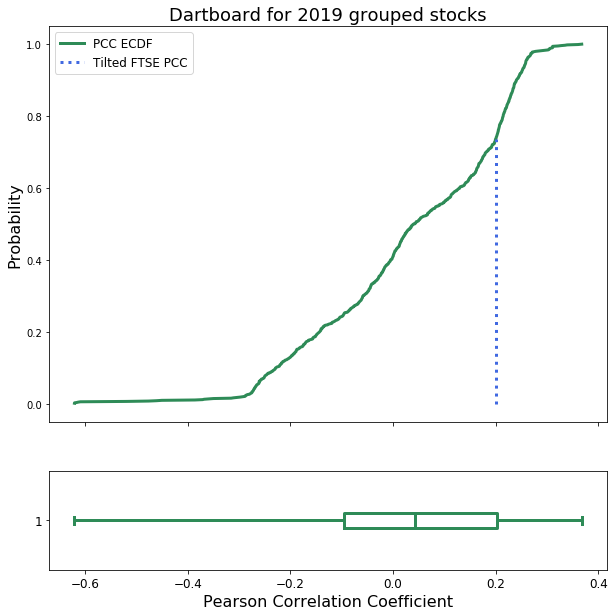

In [6]:
# generated from the above code, 2019 grouped stocks 4
dart_2019_grouped=[0.22946616055349123, -0.04674186415637886, -0.05953400894299067, 0.2128441004871612, 0.23346794263702608, 0.31109335117819803, -0.14852655874382825, -0.0497910190859035, -0.046547715892132434, 0.17926763549614225, -0.1031958137078265, 0.16581937477411382, 0.2366933259438831, -0.060209637833873786, 0.15179962653414186, 0.0986062249332662, -0.10810452501719771, -0.07139299580605123, -0.03828761359011064, 0.20459267555727548, -0.042230579989660635, -0.08269449756375735, -0.06545984068707598, -0.23230583918700562, 0.17982700917490363, 0.20269686482709362, -0.19813380049326618, -0.17204540524061426, 0.25919249641132835, 0.268489975008393, 0.16131941626432175, -0.09705398955798485, -0.24866148625540457, -0.11929541069047939, 0.2193379094198702, -0.08900132875649627, -0.16905908532463526, 0.2550019318976343, 0.1997007589497146, -0.0385867859527704, -0.013544267965950797, -0.169807299303703, 0.1966560794304675, 0.16154788545305937, 0.18953166266079874, 0.13002231782959128, -0.0973666246636953, -0.05051710277026103, -0.02394375935067101, 0.20478331854111242, 0.2713958150161805, 0.2149540800655806, -0.01908360206139032, -0.06247151311916926, -0.008440406011342435, 0.26236864972474505, 0.2780059197503062, 0.16303177694366427, -0.149442118262249, -0.019681030211881348, 0.08196464674580325, 0.22651883952579271, -0.016164015514649587, 0.1663661893438131, 0.21780020155094273, 0.03609090216970455, 0.23422974230195207, 0.23543996098004882, 0.11315712613472431, 0.15961092126331797, 0.11276980587770122, -0.07519449446170573, 0.23675593506797452, 0.20343791665554917, 0.2260967051109121, -0.24990040650550993, -0.24272355305985566, 0.23376088201761797, 0.26849671749210924, -0.05012219302106973, 0.1746391694216603, 0.14059537729306, 0.07227109693544831, -0.2611832512402245, 0.15543901016465161, 0.2231490623716762, -0.1877959389070436, 0.23861564210473515, 0.15174641310606574, 0.2007449077559078, 0.25022503724235995, 0.21600480026291266, -0.22785893917124295, 0.24844425406286266, 0.20536809003914847, 0.06520160822708446, 0.26027574994015573, 0.25559997237986565, -0.13636852872939775, 0.2575546076009116, 0.11306570468515817, 0.2133858012046635, 0.1399468176592633, 0.2891380761167719, -0.26075460571625547, 0.24607320596104354, 0.05407298785264453, -0.00462976874378413, 0.12384514097095073, -0.0790222207853625, -0.3108138450211387, 0.2530058087637399, -0.1906074867417893, -0.270579496981183, 0.08350221902212326, 0.14940369856346608, 0.24602747352674809, -0.2257496014861739, -0.27473311013107865, 0.01468575616687697, 0.14532160076789777, -0.03029635937423371, -0.19849819767095922, 0.25814336438686447, 0.2666944922243189, -0.15608160875541982, -0.17524610108579572, 0.002588105818969986, -0.201996017498566, 0.25961768796988166, 0.10088803070686331, 0.0026893207224308524, 0.16319270520899143, 0.17884985693705321, -0.10417182335037278, -0.221176724005975, 0.25271719294346284, -0.15412859569759302, 0.03790542862018899, -0.04084217323945895, 0.305604617840569, -0.02093441969667209, -0.01622166963544065, 0.2060232509651117, 0.24434827895868327, 0.012523745928623604, 0.22698805700153718, 0.20386210808516514, 0.20426682643577873, 0.25890038240087676, 0.02772874064814096, 0.11722593322423788, 0.04500768101177324, 0.23618774640073747, 0.10784823921016637, 0.026306562793655924, 0.033041316504961483, 0.09063815011604824, 0.09856790752849037, 0.1825026297901761, -0.2979201787067346, -0.045087202009654076, -0.271883339821352, -0.16465521330922656, -0.2722173926377524, 0.03881643354024318, -0.023440012756987955, -0.006056968805993677, 0.0829972015160351, -0.6207097337889171, 0.1201875875562815, -0.1446789207769209, -0.1748166278172073, -0.2380061856693378, -0.2571142337428109, -0.179752192140325, 0.16281322720687957, 0.22299114055327696, -0.12266447534467774, 0.1979510799335128, -0.1473130013438545, -0.014201723497801803, -0.2294912885167829, 0.10145105889099576, 0.14744724698649866, -0.047715447267159636, 0.02627536058785404, -0.017308166546203672, 0.12506297081612355, -0.09586594149554097, 0.26854492585619594, 0.22928590947717786, 0.06807067455318543, 0.11975841722279898, 0.16858068567904028, 0.21486293360066583, -0.14009241226753896, 0.20748595471328973, -0.19462312260279646, -0.01662843254361157, 0.013508218919300034, -0.13578477684652, -0.1872142102903449, -0.13164578178065842, 0.26449002978579, 0.2125708271117593, 0.018976226973635067, 0.20230473214130523, 0.24724918255826636, 0.006501650311182982, -0.2472948686229246, -0.031208167536761148, 0.06177325674351394, -0.1842161006084835, 0.17715302325956775, -0.18208757028747652, -0.09453867516254867, 0.14702988634340913, -0.1481529223287978, 0.20736096686539374, 0.23281492694762781, 0.08138078611874854, -0.2542590482366428, 0.1650149626065133, 0.0069321206214318, -0.23025680388438274, 0.1675972954839586, -0.028139607507888124, -0.18840444605215997, 0.11820246302607827, -0.6091071469038543, -0.08561655097226807, 0.1665535885258907, -0.03806215436968189, -0.015152309880055058, 0.26571685861235694, -0.029478834592423342, -0.2749963234317562, 0.17776521641606688, -0.24537159780901244, 0.19962894093944283, -0.01722260658452978, -0.13916555784107157, 0.03135311737692604, 0.02090670435807355, -0.1733343434743122, 0.10296890846366442, -0.03509645199694114, 0.1628921550676199, -0.0014968788601851931, 0.22151317524342776, 0.20769345361256114, 0.029055078955787336, 0.13419893396680943, 0.23291040860814372, -0.1496227667006529, -0.007794135925457126, 0.016431114499787618, -0.011604527690728384, 0.02405530952732315, 0.012489663101961078, 0.24046429898124935, 0.03314724772821553, 0.12543028156775735, 0.19189956575035122, -0.18097964350893647, -0.012207580002304031, 0.12723331523675435, -0.2681182375172302, -0.09713592737315951, 0.19242214653445394, 0.003774886786086752, 0.18592274932792902, -0.17348949350593373, -0.15127831568964178, 0.22820432244906447, 0.2401350219189857, 0.1997954338992507, 0.06467827529560888, 0.11228546624892036, 0.03484577432385962, 0.021372301194217208, 0.18544753947731157, 0.24052640743795625, 0.1724887125674138, 0.16385719922682043, 0.02580868022012325, 0.04365383220234271, 0.16237882720616878, 0.20651586558478813, -0.15632384334955335, -0.24641513099886805, -0.15783014053891442, 0.20184530671694886, -0.25632778029217435, 0.00894963295969671, 0.1643076004112195, 0.20138091264140706, 0.2681943231050576, -0.28384404073564107, 0.06806713879491029, 0.17751959774200504, -0.2845386577872934, -0.028490406490433495, 0.23323172015241897, -0.01983829199293216, -0.043021092853079625, 0.12998848866817783, 0.003988595005298166, -0.10591112800982302, -0.21446195910231863, 0.2184153754579502, -0.22886924114349916, 0.24832466890378588, 0.20612003105736915, -0.2875565390206945, -0.19502681412078798, 0.005837515449814293, 0.22193791778414884, 0.017104775829172466, 0.22087013935492822, 0.21468797003403983, 0.11689111752876624, 0.2554410713926397, -0.060498888616438554, 0.14471065626474133, 0.256251305324033, 0.20462908280591238, 0.16758667210592793, 0.14751640094511068, 0.16752395876687742, -0.21727239341314963, -0.04389850948075669, 0.23555122077892074, -0.035594342920125845, 0.2208081078971617, 0.0282806223282313, 0.1491702040386463, 0.16696366497874265, 0.20105906008333735, 0.05271268691032757, 0.020080374710609947, 0.17452744175577695, 0.13083399610688629, 0.16663066197314796, -0.14074505291511263, 0.19969873466941962, 0.045081479771138654, 0.20127595232284065, 0.05919147585165391, 0.15255676875639307, 0.19402937117710392, 0.22189004104213886, 0.30780916323946617, 0.0007436017426066827, 0.011734563627612153, -0.14017341670388694, 0.10660167150642377, -0.23453749055701606, 0.15673524109433679, 0.03296118407910938, -0.2523053354461124, -0.2033744067679655, 0.14199069402057612, -0.2206208102397297, -0.044112170584570294, 0.3395534443144383, 0.1866199387254837, 0.014654319663727523, -0.14266012355468338, 0.058178694073071094, 0.21727396628983156, 0.21891948149746804, -0.18868375161052842, -0.13404595705378436, -0.1930406121278504, -0.0005819233014991475, -0.2609698369769883, 0.15135170651476335, 0.20636575115643674, 0.08238756141827652, -0.125069964932805, -0.1046111417032006, 0.0001337917764670897, -0.00024007766868093788, -0.08652812042682698, 0.23378408521151806, 0.1134616565327593, -0.1753322184686064, 0.19809569041342434, -0.024438167285514942, -0.10260085000179611, 0.15926374442169433, 0.193187045294098, 0.0019488126372928394, 0.14833959527426535, -0.02811223390821998, -0.058985104180640936, 0.19809171956734883, 0.22881236407090544, 0.11640510445745858, -0.24512560503766567, 0.25637482248482274, -0.5189878133988123, 0.3112225796539621, 0.1861641376699374, 0.21308462563709732, -0.059114647898105305, 0.1492773957881236, -0.18219494877671116, 0.2529165205829026, 0.22345338653717187, -0.07697698346893886, -0.042229178379294754, 0.2514084036194608, -0.020761150197288136, 0.23844452760264673, 0.11438883044281213, 0.04480195237232814, 0.2439705821704716, -0.24943078712986322, 0.13035758401897024, 0.17250461664243283, 0.006250103923072975, -0.11893319255893557, -0.0025026566740466135, -0.11488991818607021, 0.20309583196403733, -0.06704983222724988, 0.014398893392635972, -0.06080437751615424, 0.22161650299326005, 0.015119801909223941, 0.012292921822092148, 0.0011483931684643659, 0.32189125193948764, 0.07856493922009053, -0.22878980786935257, 0.20230847563157392, 0.2223430789765375, 0.03652820589651354, 0.26740199633521583, 0.25882049965474585, 0.30409251479638577, -0.1885956323430788, 0.1804116387649239, 0.11099233745777215, 0.10665532717015479, 0.22610048324485102, -0.2695088262664736, -0.08347950684505324, 0.21325260041921024, -0.2660117667239985, 0.0008780725253466105, 0.2357235121746512, 0.2525758789412188, 0.17181580970502092, 0.22819842285134045, -0.1929766645068055, -0.45036900238565875, 0.20763250803363947, -0.13327027325364443, 0.07166097678160321, -0.022413529494996497, 0.009773778466896367, -0.055337425867881804, -0.0004780397773976484, -0.19102183270242526, 0.2473777948523211, -0.11286008640696887, 0.1832297026370077, 0.2619827537141234, -0.04723756712396729, -0.06154718755601994, 0.31120756332239163, -0.18826884852811493, 0.19261415809351856, 0.039380679254111615, 0.2677371392733282, 0.1885143497796009, -0.09963055936137362, -0.02327209895039966, 0.07146237323588236, 0.26459988262303374, -0.0691141216104789, 0.23050533356171032, -0.03134031247742072, 0.04948085484633567, 0.022959964019545104, 0.13779177938220186, -0.0017492577184970793, -0.06735178289399929, 0.20694210370782168, 0.2082111712082647, 0.014714687972913086, 0.14378106091034518, 0.14117049895947287, 0.24679967530525185, -0.1401303016269537, -0.27339065358756776, -0.21729991874134635, -0.018675641649857827, 0.21946556072962414, -0.19909540490298905, -0.09511978352363748, -0.6162576900793353, 0.21562293550693762, -0.2589609314419427, -0.09340280757160316, -0.11184989739664783, -0.011588181019528899, -0.0987202247882013, 0.15859452729554058, 0.09822828303787656, -0.008849548823340712, 0.24582525930607443, 0.18137862205445462, -0.10520173853693025, 0.18381436661481831, 0.21820052504872606, -0.2444807440495118, -0.14209689732148606, 0.011396066111031307, -0.2193776387103032, 0.22413769405324824, 0.17954276407508354, -0.17470899674061308, 0.08703959242140294, -0.06464057340262697, 0.21169534551646513, 0.2687157537938072, -0.2507602717190005, -0.2655293456645259, -0.2627039602545107, 0.20764614348036278, 0.2602677445075099, -0.2670865326615713, -0.16719598658993595, 0.19409740782100604, -0.1076300846721086, -0.22283318650812217, -0.12719082094338727, -0.27872405213803614, -0.14334139679687963, -0.2108558001312037, 0.30536720130978756, 0.12170323108552233, 0.17538757951258846, 0.07054290594498118, -0.20958434126072095, 0.2350092282238927, 0.2570782854482655, 0.31122495623140584, 0.12405520434950978, -0.21497829532245671, 0.07711214877248052, 0.000138255766932654, 0.22619457593531125, 0.141836259498007, 0.23811162344105216, 0.13968975501362013, 0.14675376798201473, -0.1400967627128306, -0.2588417506658309, 0.23201980910436748, -0.2268795816904018, 0.1697966366808949, 0.07595968655627866, 0.09309372117650566, -0.007630435422338583, 0.17383262259974014, 0.012492971790041071, 0.05007622549498006, -0.2689103051466115, 0.21080512072723348, -0.10969444043432779, 0.01666967622831086, 0.19893447422240787, -0.15005044382127447, 0.11361655122674674, 0.23606912643550296, -0.05217694048530856, 0.11267402224925044, 0.16010489358833255, 0.2592074758611492, 0.06788190537621328, -0.016879285575953466, 0.17265252583897195, 0.2587020847171855, -0.1953823021088659, 0.00916490779002038, -0.170356038205022, -0.004779441795297486, 0.1267780617199396, -0.19216478261276732, -0.005128667179133712, -0.19120554902091205, -0.025389745051282293, -0.21740504451086656, -0.08592346047496693, 0.21075203219496974, -0.16463412158317, -0.24257135779356365, -0.1505372554679859, 0.035170997229495654, -0.23919171254651045, 0.21758239463408746, 0.09669313065718378, 0.24123284231194347, 0.2979740526833672, 0.07671481914927689, 0.002214681328490808, 0.12791322820125461, 0.03515447876460597, 0.17230174663954442, 0.017086412358086757, -0.08768476648008477, -0.1558181787621585, 0.04535794940872914, 0.19304163481381298, 0.20551197424906953, 0.0012267577398063466, 0.019294285960418434, -0.06614051128053659, -0.009824712009306593, 0.04262575099377878, 0.25626580379115516, 0.05070068010279857, -0.2383052771355999, 0.17992129976101906, 0.21815701338926702, 0.002972024141075158, -0.04159457313943042, -0.3708825881210198, 0.19684909126249817, -0.11886788483868357, -0.02699610477030169, 0.054194605521129854, -0.05488658083694965, 0.17562498961532502, 0.05716015434158097, 0.23416023702302652, 0.07443806142704776, 0.013889993051242406, 0.04786521623529879, -0.20697838265722385, -0.26222659326625763, 0.24165252137354665, 0.05246231882033944, -0.02296605615309343, -0.063900271348998, -0.025484886544835376, -0.05756052558055706, -0.2749039281683218, 0.1562770332426485, -0.1832887292078536, 0.2510685173777332, 0.023701747397224915, 0.029243536487777506, 0.21617221713750456, -0.14549054976042336, 0.2274349653153911, 0.1656597186159824, -0.2774384103104259, -0.0226484348358758, 0.23019382644590125, -0.26070067497546634, 0.1916260720616753, 0.09568650795047441, 0.022174846620417604, 0.17013102790599272, 0.15148069580052326, 0.25790822757405074, -0.08817168173674182, -0.2682950017256585, 0.27077841151370924, 0.15665899197825364, -0.14076341493089362, 0.1025987730579665, -0.05459376647037387, 0.23329317653462509, -0.059277168644671197, 0.23213081739913854, 0.017173671033477146, 0.33536886490832973, -0.2719240987486128, -0.03506933348866802, 0.14757489371242555, -0.21584571698238444, 0.2585977035957389, 0.09058106026313073, 0.25892236891239107, -0.001678377906380332, 0.03113899270916159, 0.052181111163556775, 0.2317537133594319, 0.21861476831478768, -0.3498942020291037, -0.05199258202780934, -0.19696000190035237, 0.2164151420059847, 0.3679447806684176, -0.09551729412108606, 0.24251252781894644, 0.1999087298049973, -0.04623309858112285, 0.10058133984369907, -0.36799231881373806, 0.26185493273599647, 0.22901915445676047, -0.288243309222565, -0.11357172427386548, -0.03004479001551152, 0.21496176516114845, -0.07470821227958316, 0.2264573187051906, -0.05320131224204771, -0.10485948661506911, -0.04935841465711105, 0.24739911121550937, -0.21117127575761827, 0.23636702255398354, -0.16002928121388776, 0.2419956996157294, 0.21628958386224878, -0.08105103230276856, -0.0440120020446825, 0.2305166042553558, 0.22943427345512468, -0.013730302258051354, -0.0435862146624733, -0.09665714954838037, -0.1873413994238598, -0.08271938606060024, -0.2655001794136478, -0.22128593575226288, -0.38613059354027773, 0.1925676864070891, 0.22758787695432653, -0.25044002606363913, -0.0592654311743976, 0.06778730950568773, -0.05771032108631045, 0.16114044216278006, 0.07444353184721633, 0.24685198077390622, -0.6135191116946701, 0.2513741612932838, -0.21482790276551625, 0.1523356126018514, 0.20351108690379588, -0.06856658702776869, -0.01866560245814817, -0.1760182940791727, -0.14424514759080614, 0.2533783231954894, -0.020860894078681906, 0.2364166684891282, -0.061330913826792434, 0.22486213656655396, 0.25535100756096907, 0.19948345595909261, 0.013109710657380994, 0.0011301526983478628, -0.006676661882889174, -0.06635083407768873, 0.0018044228037288309, 0.24961414086858436, 0.21023077464552348, -0.17104101182337883, 0.19783955196138003, 0.19938709409704236, 0.0695722876908413, 0.2358807531104772, -0.22960109360110129, 0.20533961726385003, -0.4762899930092381, 0.3276098685446185, 0.2404116420752395, 0.05010178578459768, 0.11918948320470296, -0.26947156002830297, -0.14637783625113004, -0.04252958984670118, -0.005316697056179991, 0.08252226902275525, 0.2716692734041447, 0.1310476400708302, 0.2102512780448523, 0.0033771646425513465, 0.27082130382765857, 0.22468325468172506, 0.36077537871815024, 0.27526864808586377, -0.28750387785963344, 0.17457394108184576, 0.20489576257864858, -0.2519060973372538, 0.19799809567935478, 0.10274196040878254, -0.27932590689163683, -0.25011634659036475, -0.05857136044492661, -0.16310045552886568, 0.13942557862135085, 0.20532591601833067, 0.18328798932519239, 0.23679748971829706, -0.1358099596970046, 0.03638764259597374, -0.17751900403702217, 0.11510690315256929, -0.20021432649873366, -0.46069352109040584, -0.03277634071267592, -0.004866803356574632, -0.04408124861369924, 0.24458002433307752, 0.31122138269513344, 0.10564275255731673, -0.15610328625086498, 0.1859419609422266, -0.2509615704504999, 0.24001572115903824, 0.21524422370918722, -0.027637274951867328, 0.09036399791444352, -0.03369304837936005, 0.2339468186726457, -0.23445907358071036, 0.21096272540900324, -0.20533242787984896, 0.25787365996969064, 0.1745360802324319, 0.20899240178016903, -0.07710196226751233, -0.03474891373877584, 0.2628477206726201, 0.22370270835397216, 0.003817290619812762, 0.21719202081669067, 0.20313287562625362, -0.09493089345107168, 0.012665069143916532, 0.020945672251240475, 0.09094026119816027, 0.018788613405562805, 0.26051613327892065, 0.027849313475188767, -0.04675391256370135, 0.16182667139322604, 0.024100242390494565, -0.01808448841852587, 0.20898176624783846, 0.11135768551612937, -0.2727601653133029, 0.21373310606420332, 0.2619146663424803, 0.30436117764754433, 0.005273931446538529, -0.3153526658911978, 0.008307555264048219, 0.23794220534855548, -0.018772525025597675, 0.024081854600202398, 0.25199297401455006, 0.1710172300296981, -0.20287510198796724, -0.06354900899312517, -0.08319296930002892, 0.21297518823435885, -0.2006246988968874, -0.35765243450441064, -0.26879217757160073, -0.21203446674849868, 0.2187772201385578, 0.22823006631349108, -0.08534464885102153, -0.2581740737809311, -0.07828833739269685, 0.21419941066810222, 0.2510273029776915, -0.04262078878062006, -0.26066688086704126, 0.20755617398609738, 0.05373550926358621, 0.07351292890513636, -0.23364494555702142, -0.08074975866220285, -0.21982260303384837, -0.02778580057774544, -0.2867362575739908, -0.3041371625671314, 0.035149257321718884, -0.2712868408774259, 0.23096093956402083, -0.11644690855739492, 0.20546034999309956, 0.2089038510434649, -0.11852168477241111, -0.20603331082342471, 0.25113388461328096, 0.01956285696793176, -0.2710386456041184, 0.21431062377016702, -0.1265738850381377, 0.16696021219782559, -0.1657602160950728, 0.1763859313742281, 0.232418450350592, -0.16949006941814784, 0.16706548756160272, 0.22646937724785915, 0.017718183922736944, -0.0442296361190423, -0.15487619869610464, -0.0011470418862120288, 0.17341002011882942, 0.21378644506387662, -0.15097007846505608, 0.016493448589410653, 0.25630990768731254, -0.27609010620082763, 0.21178234703747223, 0.19254938228063356, -0.1969383097506645, -0.02749031549199305, -0.074805284782338, 0.23928063607459565, 0.006683289237339479, 0.20986301038686242, 0.23566753705477805, 0.16368951077232405, -0.26429348608019826, -0.047244831890979354, 0.22522955516732268, -0.23149047809352213, -0.22072310766424397, -0.14164679553506598, 0.20207841826143746, -0.2565614174965215, -0.13398181745407797, 0.22183580085679672, -0.17082073566984407, 0.22899993709587962, 0.2536778675516023, -0.2607272612402007, -0.27453603724562026, -0.266690772561262, -0.13708804644578665, 0.055875853246332055, 0.24465184945264956, 0.2134166662388238, 0.13985400996468156, 0.16316830435918356, 0.20111056043381664, 0.10759542390093069, -0.18935985398089838, 0.2149040721483792, 0.1893300240928611, 0.02220295190352707, 0.04260917775558612, -0.06168036480104955, 0.06712616360476335, 0.20673508539086194, -0.2933346146059578, 0.1611045182148146, 0.30230581795510825, 0.2071029762856286, 0.2844725501651888, -0.13731429989573596, -0.01570901936958967, 0.14654939680885692, 0.20416408475997655, -0.06849668686646172, 0.17559769469314457, 0.13458690716342803, 0.23057286284436956, 0.023854795091864073, 0.02682204315054315, -0.6206102223377656, 0.10904556468324894, -0.26069021321706076, 0.06726542173603073, 0.17940046876595844, 0.03826697373294319, 0.2448701905849091, 0.013662122831359258, 0.17055024188529397, -0.008606024193526948, -0.07205294799214988, 0.22201186767255127, -0.23589894819724305, 0.08674189569532487, -0.21776406738389065, 0.22101971818536126, 0.2628552383343825, -0.04902705657141129, 0.22501845073118512, 0.13841517155713873]
#plt.hist(dart_coef, bins=20, density=True)
#print(len(dart_2019_grouped))
pcc_2019_grouped=0.2

ecdf_2019_grouped=ECDF(dart_2019_grouped)
fig, ax=plt.subplots(2,1,sharex=True,gridspec_kw={'height_ratios': [4, 1]},figsize=(10,10))
ax[0].plot(ecdf_2019_grouped.x, ecdf_2019_grouped.y,c='seagreen',label = 'PCC ECDF',linewidth = 3)
ax[0].plot([pcc_2019_grouped,pcc_2019_grouped],[0,ecdf_2019_grouped(pcc_2019_grouped)],':',c='royalblue',label = 'Tilted FTSE PCC',linewidth = 3)
#plt.plot([-0.5,0.839],[0.999,0.999],":",c='royalblue')
ax[0].set_ylabel('Probability',fontsize = 16)
plt.xlabel('Pearson Correlation Coefficient',fontsize = 16)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
ax[0].legend(fontsize = 12)
medianprops = dict(linestyle='-', linewidth=3, color='seagreen')
bp=ax[1].boxplot(dart_2019_grouped,vert=False,whis='range',medianprops=medianprops,boxprops=medianprops,whiskerprops=medianprops,capprops=medianprops)
ax[0].set_title('Dartboard for 2019 grouped stocks',fontsize=18)
plt.savefig('ECDFGroup19.png',dpi=80)
plt.show()

In [206]:
#this one takes ages to run don't do it, run the next one instead
dart_2018_grouped=[]
for i in range(1000):
    tiltWeights = pd.DataFrame(index = fullStockListDf['0'].values)
    fourthAttempt = [0, 0, 0, 0, 0, 0, 0, 0]
    catTilt = np.random.uniform(-2,2,len(fourthAttempt))

    tiltedFTSE = jackTilt(catTilt,tiltWeights)

    #Get only 2018 FTSE values for tilted FTSE, simulated untilted FTSE and real FTSE - starting from the beginning of Q1 18 (24/12/18) to Q4 (20/12/19)
    tiltedFTSE2018 = tiltedFTSE[(tiltedFTSE.index > datetime.strptime('Dec 16, 2017', '%b %d, %Y')) & (tiltedFTSE.index < datetime.strptime('Dec 23, 2018', '%b %d, %Y'))]
    
    #Pl price for the same period is 'plPrice18' defined where individual stock correlations are found
    #

    #find correlation between tilted FTSE and palladium price
    correlationTiltedFTSE = pearsonr(tiltedFTSE2018['Open'].values,plPrice18['Price'].values)
    
    # add correlation to sample list
    dart_2018_grouped.append(correlationTiltedFTSE[0])
    
print(dart_2018_grouped)

[-0.3301491386390696]


1000


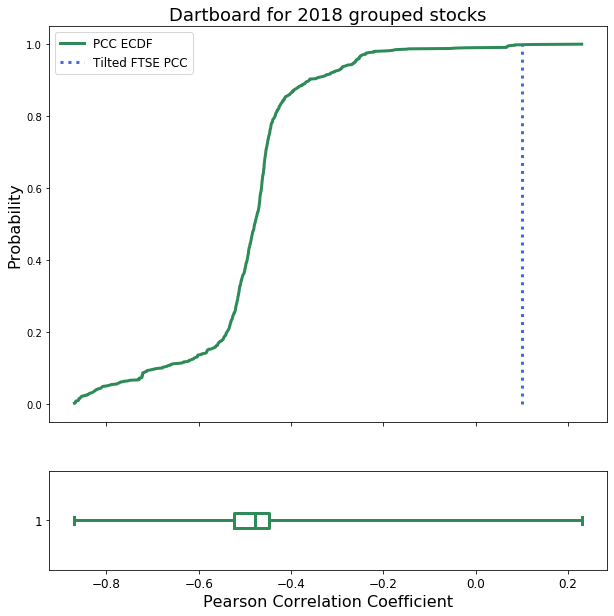

In [7]:
# generated from the above code, 2018 gouped stocks
dart_2018_grouped=[-0.41940859015975307, -0.3265074306160047, -0.5100781639716518, -0.5409396019716797, -0.4614527118745713, -0.8673090738936535, -0.5127973959473753, -0.5116261979335164, -0.44558157159359657, -0.26079711647799037, -0.491033647009343, -0.2343129052840608, -0.48708857989433607, -0.571073719558874, -0.4848546316361252, -0.7215538984173469, -0.21977429142199706, -0.7112317213145263, -0.43955428345783976, -0.5090750459611209, -0.7129588987705153, -0.401132579433784, -0.6432369051226452, -0.48553707496692583, -0.5502460142197636, -0.5412233122584187, -0.4365338089379538, -0.4456961149271804, -0.4929100495603213, -0.7126757198212059, -0.2603115501235078, -0.45846114185716363, -0.45086479155691406, -0.5177642565859627, -0.4203118395731331, -0.76324393956069, -0.5308542708959074, -0.4912378862947446, -0.6747480385864364, -0.37680149062065493, -0.48828281365134873, -0.4690780978170088, -0.5059268440623709, -0.44385033620350206, -0.45415881963848254, -0.3745371774829334, -0.48380292897396326, -0.7003216630132469, -0.6777364795325693, -0.4802408977673547, -0.4513811985731979, -0.45580562486128506, -0.52773394057678, -0.6029953705827457, -0.5130506869337557, -0.4936642187786916, -0.45287751944214505, -0.593973799054259, -0.5787133096116475, -0.37930506836427336, -0.4795034892955423, -0.467429451709224, -0.28644796684191687, -0.5273765630835225, -0.376712034033354, -0.2961037540738545, -0.46048949405377526, -0.2829552025379755, -0.8268175719295626, -0.8575875359559744, -0.4635593463641837, -0.4617694868978405, -0.8673185453933125, -0.4544693248810909, -0.26087640373422594, -0.45201992019137116, -0.4683354049690968, -0.4594236226464432, -0.42632667193158436, -0.4599167557327224, -0.4965662126396515, -0.5167786958276889, -0.5299747068520884, -0.4630021690486392, -0.48507872741368774, -0.4945189293081453, -0.39777282672547287, -0.41344355524822407, -0.44924640036951513, -0.4693914156820323, -0.5074988033639926, -0.6027356537563566, -0.4429508822706269, -0.35925557564080335, -0.2888129499581506, -0.46888501085409, -0.4596062433150514, -0.2525265742417664, -0.49836883936759796, -0.5111440048663886, -0.4958145009303705, -0.6073395415274384, -0.46743063952965647, -0.23794569594660175, -0.5128416999481127, -0.8369560008120763, -0.5385206752900792, -0.4061130475261494, -0.5178078099780205, -0.5424423096775315, -0.8105531138410583, -0.43412635849248626, -0.4357343552802391, -0.4260662677423629, -0.4567858860276576, -0.43427897015583283, -0.723028434506569, -0.47577294573512274, -0.48967927282092016, -0.4402962217532364, -0.632721246131031, -0.4367952213333124, -0.4463066056921766, -0.3460393768383791, -0.5139110251424084, -0.5135259673227683, -0.4427155700794143, -0.5281679199288479, -0.45504535267679264, -0.4713117684682412, -0.5397223648014765, -0.80869935370912, -0.4599799805300701, -0.8354393899054594, -0.4636675390739161, -0.47385334492314846, -0.47694944422353114, -0.5029725988349188, -0.4584877639275832, -0.5145904622856214, -0.498346743277914, -0.5544050512446186, -0.5220859418002735, -0.4505132265069522, -0.6206166132395017, -0.3965047084881368, -0.4585254701469692, -0.4613683931814002, -0.46800637543344364, -0.2509361001045698, -0.39909114010387003, -0.22048271278703652, -0.45793145522395134, -0.45383480012716293, -0.3184328055984079, -0.44633122087872, -0.45189193284980056, -0.6024388769660715, -0.43490877343385115, -0.47225443161578307, -0.42224229436903105, -0.28123955569613657, -0.5374319589909878, -0.4575486374914786, -0.4642975072287933, -0.5320683835425906, -0.5192467272037087, -0.46151872926945137, -0.2687032749959926, -0.45055255330505467, -0.7214783107373337, -0.5406955262027744, -0.4545480379861905, -0.4720174729478432, -0.8541947835965078, -0.5075503656971976, -0.4687448424985744, -0.5192723931856933, -0.44336282435094426, -0.77633963105471, -0.45561375484639544, -0.79433670743005, -0.4639640615654914, 0.06918313206088669, -0.4921003109413353, -0.511849964809449, -0.5358520756588413, -0.36066311721742284, -0.5143488849596609, -0.5162156931689628, -0.469130365816644, -0.45669671429432734, -0.45480567887079104, -0.43992087933742463, -0.4758651008537125, -0.459518294351956, -0.5263830694464886, -0.5196280500524703, -0.8602052097403546, -0.2510266197387515, -0.4132879671070029, -0.5176289026816194, -0.8202612164947991, -0.4701223840150679, -0.8593739570215744, -0.5195098426296798, -0.5200604457193952, -0.8096507992730986, -0.4502176256918665, -0.5582809096144112, -0.50409641878442, 0.07377869863887387, -0.4652372046336466, -0.4484085412655357, 0.06764406341016906, -0.4938730455057582, -0.5595206950851646, -0.4918421645077855, -0.47610101937523563, -0.869280991987071, -0.44034090159102895, -0.464729751117133, -0.3056788770626164, -0.49580617146509665, -0.30399863146851647, -0.4989349494928035, -0.5121881590081365, -0.45711979752026977, -0.3997286751988409, -0.5310537148875738, -0.432882052456328, -0.4632539620247293, -0.4685212656122416, -0.494838636114761, -0.4510572578470017, -0.49458476338168134, -0.7292584632347088, -0.44372968198603335, -0.3616972118852642, -0.72153350943219, -0.5348033823008235, -0.4675863719594898, -0.5190046100309635, -0.5354654097151528, -0.4952933898288872, -0.42780437925531356, -0.47950008151199086, -0.47788901301406805, -0.7215597230518114, -0.5155800030738562, -0.41626384930597293, -0.42947527735639923, -0.331419185437222, -0.4679437811342122, -0.4343246126900225, -0.4507314908411221, -0.5586986297896395, -0.43062520250455977, -0.458634043633784, -0.4664635505025868, -0.4695386547731988, -0.3251420387806911, -0.43358235021802294, -0.44686400787614966, -0.5266057190196858, -0.26747640441935644, -0.45515338186247073, -0.2919241190212252, -0.46214966735638713, -0.5086036771848987, -0.5620443107657189, -0.48124011865558913, -0.42709698089018344, -0.47708883419389614, -0.4592940463641315, -0.42188479002656215, -0.2898468873773331, -0.48744720351474735, -0.5637439117303524, -0.4563773277245461, -0.46941107553285855, -0.446160173249031, -0.4351110489129537, -0.4898653089342518, -0.4904479581341009, -0.856933351171127, -0.5043853453184366, -0.4428146050806934, -0.5824102640131421, -0.1983765980357084, -0.2938764513211787, -0.4594296480159178, -0.3965682832804932, -0.5831107013691923, -0.48948213394554974, -0.37024098307059106, -0.48318648070639164, -0.6345823059049087, -0.7293624259884528, -0.5211902688200447, -0.47601652761968405, -0.4440757695412867, -0.4806756363684535, -0.24597155093212442, -0.5073886435009372, -0.46333922119497745, -0.42300840290286507, -0.4582088885140474, -0.4999348392530892, -0.46587716402667095, -0.6711192547750588, -0.4490005525163778, -0.4637773429222789, -0.4680065646961857, -0.448606443135516, -0.6944479550332381, -0.6102484608555088, -0.7287504129087254, -0.48317663257946986, -0.47274247310713324, -0.49876115180720015, -0.5142700019329901, -0.4508144360569333, -0.297691899238266, -0.4975231685555651, -0.3285422398376364, -0.5327074293553873, -0.46518669396989915, -0.4978005465026023, -0.48030301715212237, -0.5513864049969008, -0.5336979351390747, -0.3152827469982538, -0.49282551643394357, -0.6605158976495806, -0.4105665449804976, -0.5128205508943591, -0.5065248002825294, -0.4582251237044208, -0.4546648146897435, -0.5810473811235347, -0.6681609442993082, -0.4669256772393294, -0.4868475909732848, -0.4803191889849792, -0.49644359811962485, -0.46298918269702793, -0.2525938808662651, -0.41833361543457537, -0.04718706290980861, -0.2576106982175578, -0.513879616415796, -0.4596267144206076, -0.4535135611483007, -0.6365107245150916, -0.5095935238869903, -0.4596339871892485, -0.49916841317531974, -0.5463766033644777, -0.8394047785328996, -0.7965270360290106, -0.43077048618625813, -0.4342680378660112, -0.5459737789902731, -0.5575276599126089, -0.5458003223051799, 0.06971761071943683, -0.5172961850756739, -0.5087668259796517, -0.5052032192847454, -0.39653834397719556, -0.48576282803817317, -0.49389869895211996, -0.8613786121193234, -0.5004101097312488, -0.6541467166961416, -0.4416896063762728, -0.47030479265723396, -0.7712409636551187, -0.6191056322312664, -0.4397468860486107, -0.4641175772689044, -0.5086057671735951, -0.49749607773571414, -0.44303892202795836, -0.8069866940297079, -0.43192087150485414, -0.8228605101400686, -0.523167543116361, -0.623938494935281, -0.43345979608696006, -0.5153207076768933, -0.2470305155390525, -0.45978672828266137, -0.5091962423157805, -0.4463134498916976, -0.4997093893692114, -0.45813066503545946, -0.46895796950133944, -0.5196015954834259, -0.33879049570265113, -0.456284818259284, -0.2941060801857465, -0.49096739356705094, -0.5085128463143553, -0.494037933208316, -0.5206101535716084, -0.8672427643746051, -0.40259256761436557, -0.2599387216882504, -0.489301693461791, -0.5004549175532609, -0.451026393971515, -0.4618146883630389, -0.4763457009993353, -0.45991709646265144, -0.46211894106523443, -0.2384171825292256, -0.582384015512859, -0.5129593444022484, -0.45802531112387057, -0.48694445654147306, -0.4492412752335731, -0.5480267928099944, -0.4838982238399149, -0.43378558525853284, -0.5011174831005301, -0.30566434245043855, -0.46251176481909895, -0.501782384859077, -0.46458586283799597, -0.44804537663555166, -0.4921696257881565, -0.6879843992159492, -0.4778388160662367, -0.8600935360979234, -0.48059676021131115, -0.4914811795070394, -0.4492553156452491, -0.4585531237509168, -0.5451785405987213, -0.5149720264314748, -0.7294700615031863, -0.46873415927854833, -0.5630328777520841, -0.59374827718293, -0.3818113253663666, -0.47322378905067014, -0.46162275892005633, -0.480429208173619, -0.46615973080513023, -0.44535343098590746, -0.5361861129142393, -0.8179643566427584, -0.4020803348260991, -0.47532814826208675, -0.4249115526675695, -0.4233615303309573, -0.814254069914246, -0.4431342331749251, -0.6204699530620748, -0.36572413370874474, -0.5569605011343357, -0.46790405724571915, -0.41287384255612747, -0.24913985118424717, -0.3885016372915555, -0.48430616811671584, -0.39310707404871115, -0.2642195270675264, -0.4525502897999899, -0.6229049861332485, -0.5405687651566302, -0.46636192207233923, -0.42351646663120657, -0.23767982334579363, -0.5446098654812094, -0.4677034844311735, -0.6613144188899085, -0.5317382828811363, -0.5254437281946478, -0.48647870192823184, -0.45726023469423493, -0.4474259843116578, -0.5136428830743773, -0.6786555805069061, -0.4323732281727938, -0.5003630287803303, -0.4771916833271981, -0.253896286472974, -0.5012475233211164, -0.5203882479149127, -0.3693826146021048, -0.790557861782293, -0.531844721563593, -0.43333928216239836, -0.5467977769744035, -0.457366179884951, -0.40769335348725877, -0.4882814003191052, -0.8608142049225342, -0.47323270943345785, -0.5184206795856547, -0.48812643188884897, -0.4238482124476316, -0.5333835601133967, -0.49870346797910725, -0.4548318615855861, -0.5967094272776202, -0.39371857972706503, -0.7209231440896072, -0.428524161082582, -0.5246807520280055, -0.4598652506348416, -0.5389344253333415, -0.44494831292186643, -0.482085128423871, -0.5152852287066911, -0.26290562032876263, -0.451693565709668, -0.5157275885533498, -0.5168243452569435, -0.5303029779975663, -0.7706330211401661, -0.28997581943861284, -0.24391226918565181, -0.7480457907507957, -0.8120052396423416, -0.4309725971716962, -0.4624345189501218, -0.49213444593077665, -0.512000678272295, -0.23798692744500757, -0.46003604437792767, -0.41612652865676375, -0.474080989958103, -0.8545900214139274, -0.5201779208704149, -0.4703981721800361, -0.563400694665898, -0.3840588738407513, -0.4525886964775916, -0.5556627901447113, -0.4670044822162276, -0.49507961363255826, -0.45220176741962426, -0.4951293283670951, -0.4818757066725209, -0.7133983854035694, -0.6028224560738993, -0.46323487432415666, -0.4795774434711338, -0.5168447313614315, -0.4783798514848673, -0.4501046941822736, -0.5668920553264509, -0.4839850307750848, -0.26033130185101455, -0.5315245915165818, -0.5169438269223019, -0.5002942132480667, -0.44558370893535126, -0.5310578392075915, -0.4262578916566325, -0.7997344729437356, -0.46287066043424, -0.8462575422701879, -0.456200007398872, -0.4916540104360817, -0.550207646003654, -0.3150054891902189, -0.6652545882977832, -0.4658129750269011, -0.7294593018958668, -0.8600289273990496, -0.39358164446412025, -0.44894506388837585, -0.4573039456964921, -0.4673450949077116, -0.4427045093720573, -0.5379262176926598, -0.30888468841801303, -0.5006714894496446, -0.2650266670440182, -0.48780439696069194, -0.47339404958295783, -0.5296092124234268, -0.5586346150029812, -0.054440953594084025, -0.5489425699707868, -0.17663195076370247, -0.3102684956863275, -0.33474235253464446, -0.474043630418536, -0.5267119991330619, -0.36747762066243767, -0.5233886859209718, -0.4790197774621979, -0.5085576807547434, -0.25226148111550317, -0.29226993905774024, -0.47427415881290125, -0.5120129395566686, -0.4987281169515176, -0.3689820890552095, -0.3696564674406986, -0.457249023373913, -0.8279710670871332, -0.3137937410309151, -0.5817125140003002, -0.4638200906441472, -0.5143003419307616, -0.4683425521490264, -0.2569708529025772, -0.4575249567193541, -0.7517914508769453, -0.4538152892973636, -0.4118888553741596, -0.4215142184059816, -0.47209726578561356, -0.5320753556661135, -0.4943736177820417, -0.45371099455932423, -0.4790284173692373, -0.46316139345902335, -0.48933561764177613, -0.8241323556064815, -0.4584994091248794, -0.5096592481809546, -0.4855148656277992, -0.5210483347390986, -0.5302052249936439, -0.5122730511357245, -0.5268447737775648, -0.7029837120290154, -0.6030910925145077, -0.695378690909918, -0.5124649863551292, -0.8243968008651212, -0.4255817834558701, -0.5161707068291024, -0.4630058928498041, -0.8669602288257305, -0.26426475279759726, -0.5283134720961075, -0.4520311761922992, -0.4938185797862968, -0.3979347625125583, -0.5334388617152113, -0.4682019668177804, -0.8540371161598431, -0.4040818837239013, -0.789402606609606, -0.41645186079581237, -0.45721805519363484, -0.48911852090316676, -0.5049083876082099, -0.5232760082822555, -0.44079939189805734, -0.4679925185407925, -0.5272429251925118, -0.49217421250479304, -0.7293704919869055, -0.4659114478401457, -0.7064788968673268, -0.5040995149272447, -0.5038397583456408, -0.4997411702188445, -0.3745243989963953, -0.4603560464590858, -0.4710545483468959, -0.3591739895709961, -0.4743612554082304, -0.5218043173373861, -0.42087280166612745, -0.36794798432241405, -0.2676779989615631, -0.38556603570430037, -0.5156648283648644, -0.5057578672627762, -0.418309096985644, -0.7216208703734796, -0.7173964061886926, -0.497907160617466, -0.4906227111147273, -0.4850587432104311, -0.7212589945623029, -0.8558826554119096, -0.44044542336952525, -0.4264377685397568, -0.43860378004760214, -0.47495359528471137, -0.24903922708924883, -0.5440529183455198, -0.27917716061557113, -0.5405322294239263, -0.18645577207414335, 0.08447679617534493, -0.3417274215718082, -0.49619046749560913, -0.42938083500812796, -0.5293048292979258, -0.45567997254576725, -0.2522662597849539, -0.48534634745559746, -0.4581869454655286, -0.43047185518661857, -0.5023880625715731, -0.8465926257761343, -0.4499395388717843, -0.5200067844374517, -0.4846280900943961, -0.47872779467125004, 0.06702672788434144, -0.4666253209385386, -0.47763762015324523, -0.49111958201686734, -0.5071796059108344, -0.5841085905722239, -0.22937015169486813, -0.533868100362116, -0.5793386146789943, -0.554055973657823, -0.7755164699283792, -0.8287313296959004, -0.45499769325062966, -0.5185873790307369, -0.8260579521914709, -0.4830819004649173, -0.5180164267417745, -0.6672691552330078, -0.4469440010168184, -0.5156462351797313, -0.6108840035860261, -0.46902121294197785, -0.44645118077106516, -0.4934080811814754, -0.4632808264072763, -0.5090368336599795, -0.563436063615784, -0.4876827099209389, -0.4618665095425286, -0.7164868200239572, -0.5696258879912314, -0.2204607453398783, -0.6149372621527334, -0.4621950653105126, -0.529932139280425, -0.46873763548339276, -0.020912493398707824, -0.52367554666151, -0.5205364085758422, -0.49315654714717877, -0.5911313432387395, -0.36266574495150555, -0.5082432848990909, -0.28872853317452785, -0.4473804805146769, -0.831793671042623, -0.4070895711798449, -0.40273292476549477, -0.462457838336346, -0.5461296370985197, -0.7533562349194576, -0.15051063650612082, -0.4397817770394615, -0.470231933446668, -0.39113501524522665, -0.4551007758516038, -0.4912889533775295, -0.48001502577337235, -0.46451555431250263, -0.5395452539879237, -0.5269954813137117, -0.2502865005842523, -0.46047036179596473, -0.6053696069873729, -0.4865548862296311, -0.5187735779338274, -0.3016156856138351, -0.45625692302024307, -0.5821904809215007, -0.7230284952689263, -0.546586265008719, -0.4664496686351167, -0.48665442244276685, -0.4837208819911284, -0.45207353819383844, -0.4812139880624544, -0.4978161755383607, -0.35956003639267975, -0.541409713624101, -0.4194178310361181, -0.4733370788133682, -0.6095643557170219, -0.4439640567995722, -0.5554128451552691, -0.4614061984959131, -0.5335460067625775, -0.3142573097847565, -0.4638726925647966, -0.6572311526742387, -0.44804474579239156, -0.43622736316597815, -0.49212645462970495, -0.5011066857839336, -0.5016978045635574, -0.41884677481262406, -0.4960550812655332, -0.46457638039422927, -0.514537362260806, -0.45459130681072557, -0.4758279021647508, -0.4638168025527164, -0.4768699685939567, -0.4574814456167081, -0.4694114866916327, -0.5250147828158975, -0.5127527980216775, -0.42603331241904785, -0.4617843309435028, -0.5200274903417075, -0.5122273771781627, -0.4574355477038502, -0.32361749163846537, -0.859409060515304, -0.8299902083033247, -0.5437727549737259, -0.8112903948904988, -0.28966250070629096, -0.461927592800324, -0.5327366530271904, -0.5175224396721418, -0.32352661457589793, -0.387161655731218, -0.44640856072075, -0.3439115610894914, -0.5272468962041836, -0.4800625259724798, -0.45863833977366897, -0.4612470998977104, -0.45158263313794517, -0.451318097754991, -0.4586330342621021, -0.4660817718396819, -0.5138506494550277, -0.4896780175757415, -0.7803849832890217, -0.4159407090290632, -0.532332224805186, -0.521777260920359, 0.11528595397983682, -0.4710029572881443, -0.45551209424568134, -0.3926115624533746, -0.4771647604138965, -0.27689523098401336, -0.4441081614908483, -0.8522621298807327, -0.4501777083528854, -0.5408999688431385, -0.5155959501934457, -0.4451718523793522, -0.6604898387949778, -0.612054630340658, -0.43765213664435637, -0.17939931104432671, -0.45508640167586917, -0.5821397542842586, -0.5062238197353028, -0.5064209699483194, -0.4992015382544699, -0.38393953156531924, -0.4882254669545961, 0.229619346028908, 0.06697828559517754, -0.45864220408724066, -0.49325703348131356, -0.4456504203994559, -0.8198571101721644, -0.5727307559740903, -0.4563088422537225, -0.5096029720230377, -0.7230282829581137, -0.426577478067645, -0.4749783393949233, -0.48667806164932115, -0.840574283126171, -0.6788391173872078, -0.7739103751300658, -0.44871552914467405, -0.4567896350265249, -0.4591395380654788, -0.5059683982486567, -0.49792159810124503, -0.4645434847117289, -0.414073660126896, -0.4136547116086675, -0.5201633841906368, -0.43048998763199997, -0.5113623159440268, -0.2583731040722111, -0.7230485984003359, -0.3450358870045773, -0.46331149786490194, -0.4860122216119338, -0.6325420000346392, -0.48625752667158423, -0.4643250206043536, -0.45325345373931103, -0.46708405318270607, -0.44791411329537134, -0.5052518519193101, -0.8665657728532299, -0.44430603645062916, -0.4921590170815413, -0.524879938252282, -0.46736759833948316, -0.507371584977789, -0.5369905135718224, -0.4711489319798468, -0.46758948066139566, -0.5862310599074777, -0.1449853800368976, -0.5663168466804697, -0.2576276545964444, -0.7695024675860183, -0.5583811338879723, -0.7230784371007819, -0.5138313643338173, -0.4577977980816858, -0.5247777511657234, -0.5334786333311066, -0.5352726636904102, -0.4947732390505706, -0.5255659306737186, -0.4836986514272705, -0.46275519294823714, -0.46986924136056063, -0.46291910066568065, -0.6158051916293181, -0.4979510411166962, -0.8385165598235266, -0.5344857079346084, -0.4939351328504559, -0.4803620562340065, -0.4892804831162462, -0.44389294315205075, -0.3876548529347327, -0.5115220140946186, -0.7230297571317932, -0.7625793489934634, -0.47003837078403743, -0.7230365258744936, -0.4545855319995588, -0.8404512218132736, -0.41363702568210725, -0.4924355508169522, -0.4828066549923202, -0.4585126206793966, -0.36127213696054156, -0.37372905784285804, -0.17196663097490839, -0.4678043351431822, -0.47963213362528123, -0.44377375265445007, -0.5114009656364029, -0.47546548450255943, -0.5021109419473039, -0.8662705694697805, -0.5829123062579975, -0.46688484431892463, 0.084155867872277, -0.5155258339783612, -0.46515774370199503, -0.4777057670407464, -0.4649402449760078, -0.439926449669239, -0.445687869347871, -0.4935090109419981, -0.4917316683604095, -0.4859600653217011, -0.5110934984141646, -0.46804974627065976, -0.7213577931397827, -0.4143764673233171, -0.38283121127413283, -0.4439007677199536, -0.48408360077375767, -0.5594597094745853, -0.48162756461335127, -0.4531262704869907, -0.5005031561060422, -0.6016792966990927, -0.5207509474699961, -0.4564455539796469, -0.5101397046033, -0.43922791803717953, -0.4705753296823763, -0.4729585567494295]
#plt.hist(dart_coef, bins=20, density=True)
print(len(dart_2018_grouped))
pcc_2018_grouped=0.1

ecdf_2018_grouped=ECDF(dart_2018_grouped)
fig, ax=plt.subplots(2,1,sharex=True,gridspec_kw={'height_ratios': [4, 1]},figsize=(10,10))
ax[0].plot(ecdf_2018_grouped.x, ecdf_2018_grouped.y,c='seagreen',label = 'PCC ECDF',linewidth = 3)
ax[0].plot([pcc_2018_grouped,pcc_2018_grouped],[0,ecdf_2018_grouped(pcc_2018_grouped)],':',c='royalblue',label = 'Tilted FTSE PCC',linewidth = 3)
#plt.plot([-0.5,0.839],[0.999,0.999],":",c='royalblue')
ax[0].set_ylabel('Probability',fontsize = 16)
plt.xlabel('Pearson Correlation Coefficient',fontsize = 16)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
ax[0].legend(fontsize = 12)
medianprops = dict(linestyle='-', linewidth=3, color='seagreen')
bp=ax[1].boxplot(dart_2018_grouped,vert=False,whis='range',medianprops=medianprops,boxprops=medianprops,whiskerprops=medianprops,capprops=medianprops)
ax[0].set_title('Dartboard for 2018 grouped stocks',fontsize=18)
plt.savefig('ECDFGroup18.png',dpi=80)
plt.show()

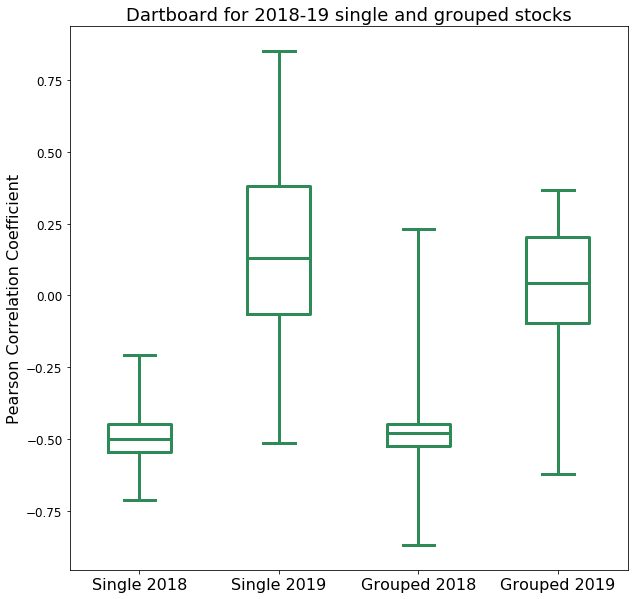

In [20]:
fig, ax=plt.subplots(1,1,figsize=(10,10))
ax.set_ylabel('Pearson Correlation Coefficient',fontsize = 16)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
medianprops = dict(linestyle='-', linewidth=3, color='seagreen')
ax.boxplot([dart_2018_single, dart_2019_single, dart_2018_grouped, dart_2019_grouped], whis='range',medianprops=medianprops,boxprops=medianprops,whiskerprops=medianprops,capprops=medianprops)
ax.set_title('Dartboard for 2018-19 single and grouped stocks',fontsize=18)
labels=['Single 2018', 'Single 2019', 'Grouped 2018', 'Grouped 2019']
ax.set_xticklabels(np.repeat(labels,1), fontsize=16)
plt.show()